In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':'1MqsMH0kAjT_vRsnDavdaSmT-smJWlQkH'}) 
downloaded.GetContentFile('marketing_campaign.csv')  

In [4]:
customer = pd.read_csv('marketing_campaign.csv', sep='\t')
customer

ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0      5524        1957  Graduation  ...             3         11         1
1      2174        1954  Graduation  ...             3         11         0
2      4141        1965  Graduation  ...             3         11         0
3      6182        1984  Graduation  ...             3         11         0
4      5324        1981         PhD  ...             3         11         0
...     ...         ...         ...  ...           ...        ...       ...
2235  10870        1967  Graduation  ...             3         11         0
2236   4001        1946         PhD  ...             3         11         0
2237   7270        1981  Graduation  ...             3         11         0
2238   8235        1956      Master  ...             3         11         0
2239   9405        1954         PhD  ...             3         11         1

[2240 rows x 29 columns]

In [5]:
print("Shape of the DataFrame is :",customer.shape)

Shape of the DataFrame is : (2240, 29)


In [6]:
print("\nColumns in DataFrame is :\n",customer.columns)


Columns in DataFrame is :
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [7]:
print("Print a Summary of a Dataframe is :",customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **2. Data Preparation**

## Data Cleansing

---



In [8]:
customer.isnull().sum()
# 24 missing values -> income

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
customer['Income'] = customer['Income'].fillna(customer['Income'].median())
customer.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
customer.duplicated().any()

False

In [11]:
customer.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

## Data Analysis & Data Visualization

---



In [12]:
customer['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

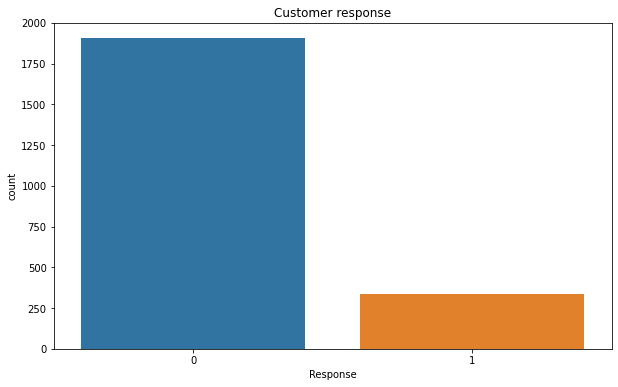

In [13]:
plt.figure(figsize=(10,6))
plt.title("Customer response")
sns.countplot(x="Response", data = customer)
plt.show()

In [14]:
rate_web = customer['Response'] / customer['NumWebVisitsMonth']
rate_web = pd.DataFrame(rate_web)

rate_web.rename(columns={0:'Rate_web'}, inplace=True)
rate_web.value_counts()

Rate_web
0.000000    1895
0.125000      57
0.166667      48
0.142857      45
0.500000      40
0.333333      33
1.000000      30
0.111111      29
0.250000      26
0.200000      25
0.100000       1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

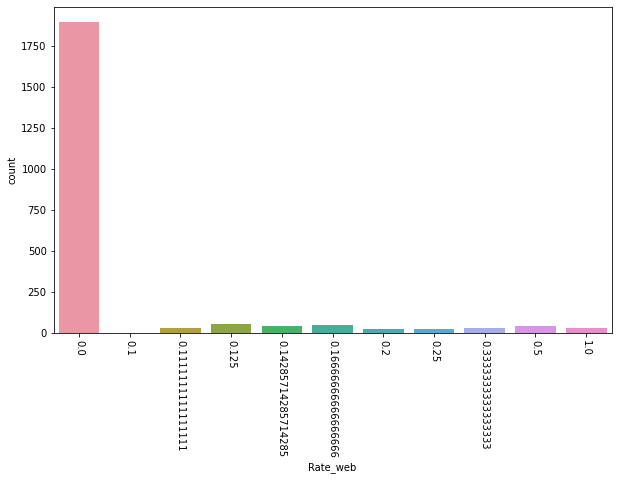

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x="Rate_web", data = rate_web)
plt.xticks(rotation=270)

In [16]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
print(customer['Dt_Customer'])

since_year = customer['Dt_Customer'].dt.year
print(since_year)

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]
0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2240, dtype: int64


In [17]:
since_year.value_counts()

2013    1189
2014     557
2012     494
Name: Dt_Customer, dtype: int64

In [18]:
since_year1 = pd.DataFrame(since_year)
since_year1

Dt_Customer
0            2012
1            2014
2            2013
3            2014
4            2014
...           ...
2235         2013
2236         2014
2237         2014
2238         2014
2239         2012

[2240 rows x 1 columns]

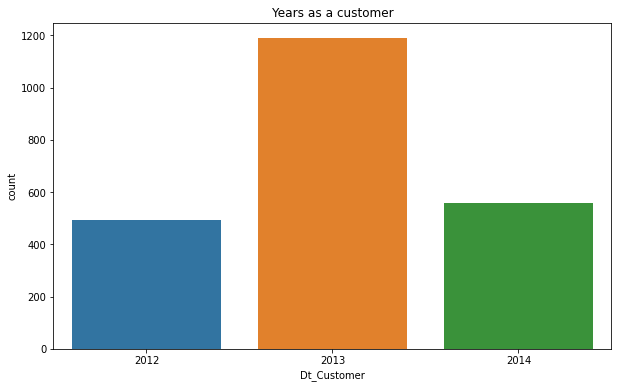

In [19]:
plt.figure(figsize=(10,6))
plt.title("Years as a customer")
sns.countplot(x='Dt_Customer', data = since_year1)

In [20]:
customer['Age'] = since_year - customer['Year_Birth']
customer['Age'].describe()

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64

In [21]:
print(customer['Age'].value_counts())

41     91
42     89
38     88
37     82
43     71
       ..
114     1
113     1
71      1
73      1
16      1
Name: Age, Length: 61, dtype: int64


Text(0.5, 1.0, 'Customer Age')

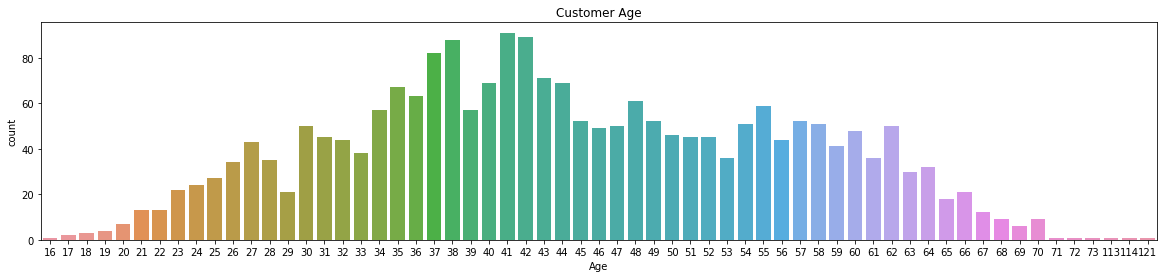

In [22]:
#พลอตอายุของลูกค้าจาก customer['Age']
plt.figure(figsize=(20,4))
customer['Age']
sns.countplot(x='Age', data=customer)
plt.title("Customer Age")


In [23]:
dates = []
for i in customer["Dt_Customer"]:
    i = i.date()
    dates.append(i)
print("The newest customer's enrolment date in therecords:", max(dates))
print("The oldest customer's enrolment date in the records:", min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [24]:
days = []
recent_day = max(dates)
for i in dates:
    delta = recent_day - i
    days.append(delta)

customer['Customer_for'] = days
customer['Customer_for'] = customer['Customer_for'].dt.days
customer['Customer_for']

0       971
1       125
2       472
3        65
4       321
       ... 
2235    541
2236     61
2237    315
2238    316
2239    782
Name: Customer_for, Length: 2240, dtype: int64

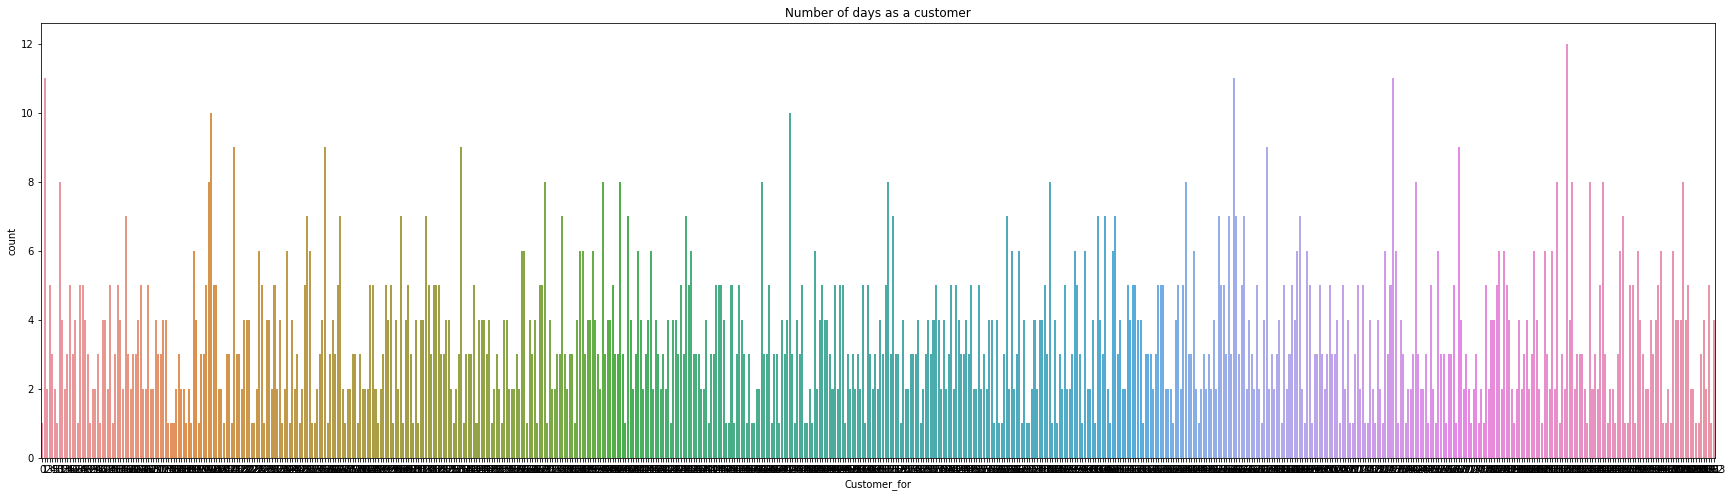

In [25]:
plt.figure(figsize=(30, 8))
plt.title("Number of days as a customer")
sns.countplot(x="Customer_for", data = customer)
plt.show()


In [26]:
customer['Children'] = customer['Kidhome'] + customer['Teenhome']
customer.drop(['Kidhome', 'Teenhome'], axis='columns', inplace=True)
customer['Children'].value_counts()

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

Text(0.5, 1.0, 'Number of children')

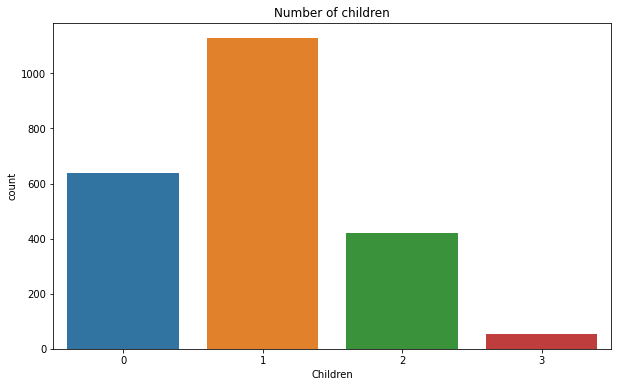

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Children', data=customer)
plt.title("Number of children")

In [28]:
print(customer['Education'].value_counts())
customer['Education'] = customer['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate",
                                             "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
print(customer['Education'].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: Education, dtype: int64


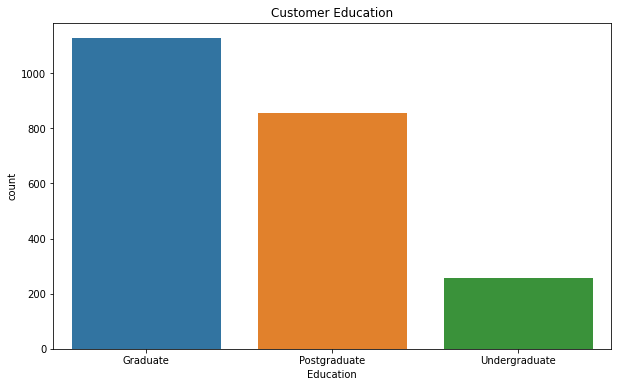

In [29]:
plt.figure(figsize=(10,6))
plt.title("Customer Education")
sns.countplot(x="Education", data = customer)


In [30]:
print(customer['Marital_Status'].value_counts())

customer['Marital_Status'] = customer['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')
customer['Marital_Status'] = customer['Marital_Status'].replace(['Married', 'Together'],'Relationship')

print(customer['Marital_Status'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Relationship    1444
Single           796
Name: Marital_Status, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


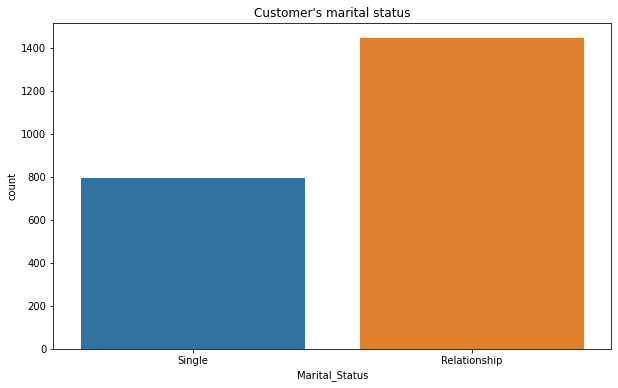

In [31]:
plt.figure(figsize=(10,6))
plt.title("Customer's marital status")
sns.countplot(customer['Marital_Status'])
plt.show()

In [32]:
wines = customer["MntWines"].values
fruits = customer["MntFruits"].values
meat_prod = customer["MntMeatProducts"].values
fish_prod = customer["MntFishProducts"].values
sweet_prod = customer["MntSweetProducts"].values
gold_prod = customer["MntGoldProds"].values

Text(0.5, 1.0, 'Gold_prod')

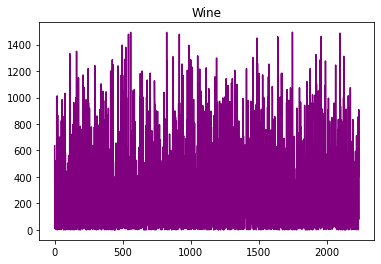

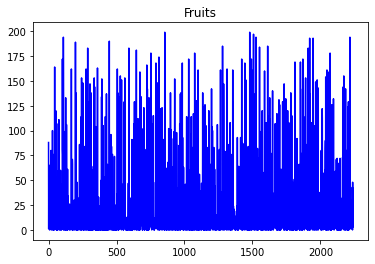

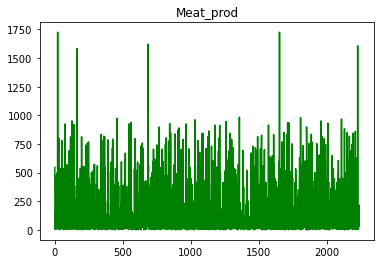

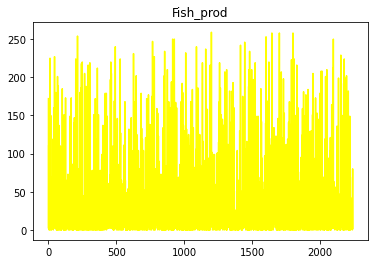

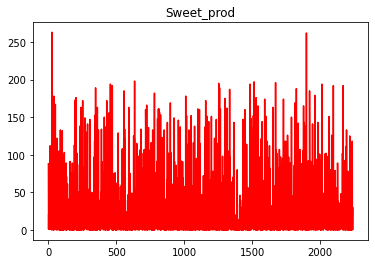

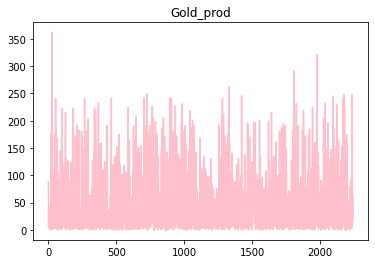

In [33]:
plt.subplots()
plt.plot(wines,color ='purple')
plt.title("Wine")

plt.subplots()
plt.plot(fruits,color ='blue')
plt.title("Fruits")

plt.subplots()
plt.plot(meat_prod,color ='green')
plt.title("Meat_prod")

plt.subplots()
plt.plot(fish_prod,color ='yellow')
plt.title("Fish_prod")

plt.subplots()
plt.plot(sweet_prod,color ='red')
plt.title("Sweet_prod")

plt.subplots()
plt.plot(gold_prod,color ='pink')
plt.title("Gold_prod")

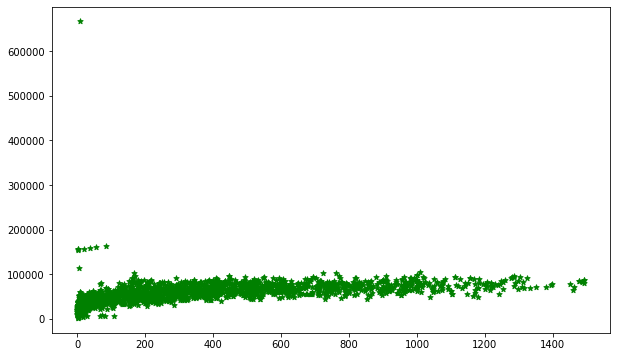

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(customer["MntWines"], customer["Income"] , label= "stars", color= "green",marker= "*", s=30)
plt.show()

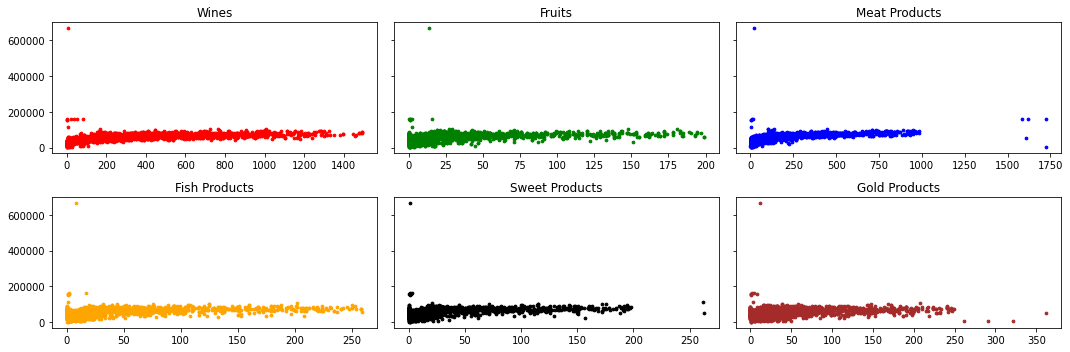

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
axes[0,0].scatter(customer["MntWines"], customer["Income"] , label= "stars", color= "red",marker= ".", s=30)
axes[0,0].set_title('Wines')
axes[0,1].scatter(customer["MntFruits"], customer["Income"] , label= "stars", color= "green",marker= ".", s=30)
axes[0,1].set_title('Fruits')
axes[0,2].scatter(customer["MntMeatProducts"], customer["Income"] , label= "stars", color= "blue",marker= ".", s=30)
axes[0,2].set_title('Meat Products')
axes[1,0].scatter(customer["MntFishProducts"], customer["Income"] , label= "stars", color= "orange",marker= ".", s=30)
axes[1,0].set_title('Fish Products')
axes[1,1].scatter(customer["MntSweetProducts"], customer["Income"] , label= "stars", color= "black",marker= ".", s=30)
axes[1,1].set_title('Sweet Products')
axes[1,2].scatter(customer["MntGoldProds"], customer["Income"] , label= "stars", color= "brown",marker= ".", s=30)
axes[1,2].set_title('Gold Products')
fig.tight_layout()

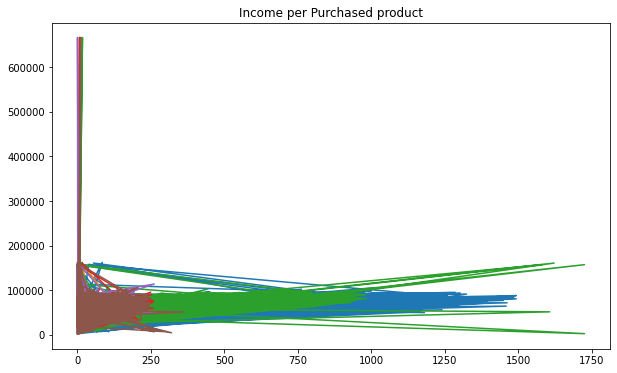

In [36]:
plt.figure(figsize=(10,6))
plt.title("Income per Purchased product")
plt.plot(wines,customer["Income"])
plt.plot(fruits,customer["Income"])
plt.plot(meat_prod,customer["Income"])
plt.plot(fish_prod,customer["Income"])
plt.plot(sweet_prod,customer["Income"])
plt.plot(gold_prod,customer["Income"])
plt.show()

In [37]:
customer['Purchases'] = customer["MntWines"] + customer["MntFruits"] + customer["MntMeatProducts"] + customer["MntFishProducts"] + customer["MntSweetProducts"] + customer["MntGoldProds"] 
customer['Purchases']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Purchases, Length: 2240, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


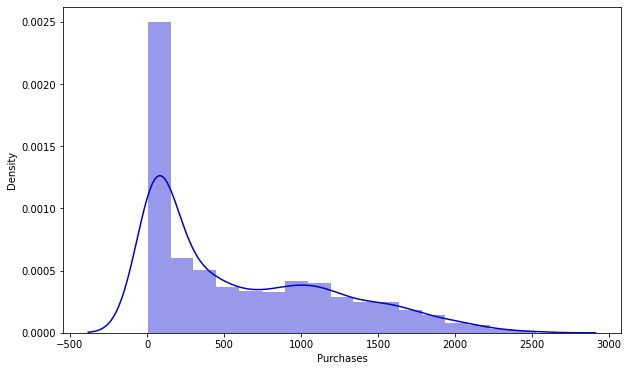

In [38]:
plt.figure(figsize=(10,6))
sns.distplot(customer["Purchases"],color = 'mediumblue')
plt.show()

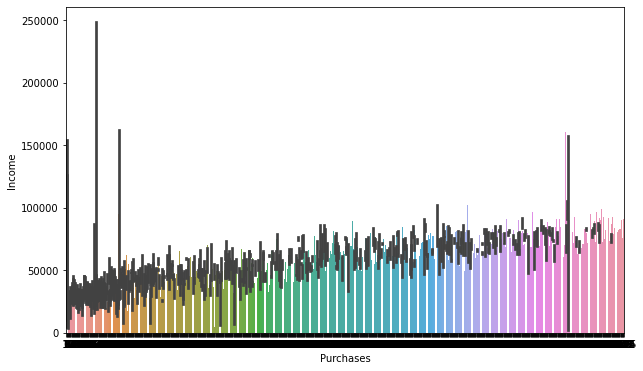

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='Purchases', y='Income', data=customer)


In [40]:
customer['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

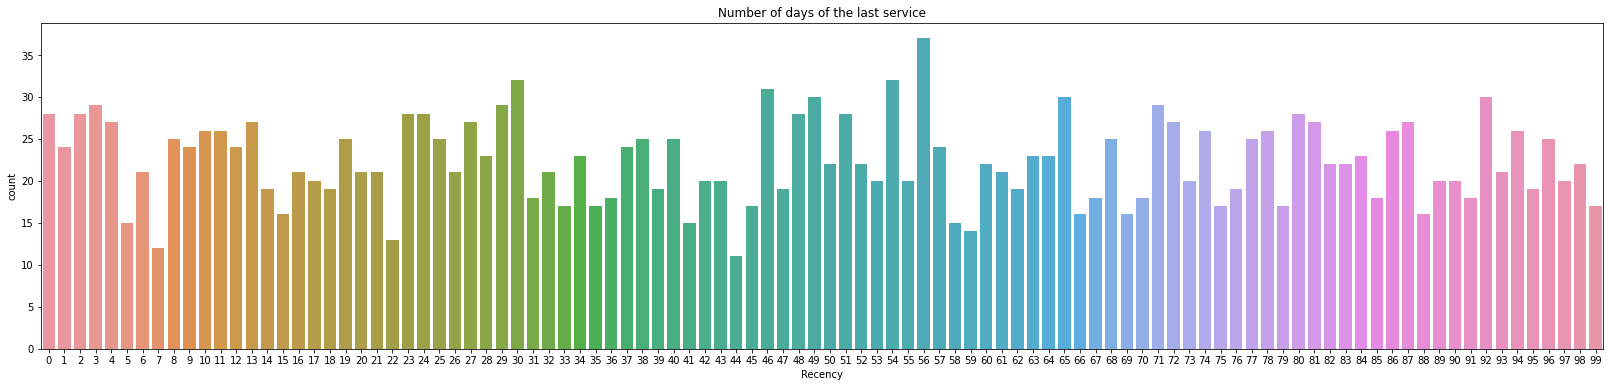

In [41]:
plt.figure(figsize=(28, 6))
plt.title("Number of days of the last service")
sns.countplot(x="Recency", data = customer)
plt.show()

In [42]:
print(customer['Income'])

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64


In [43]:
customer['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


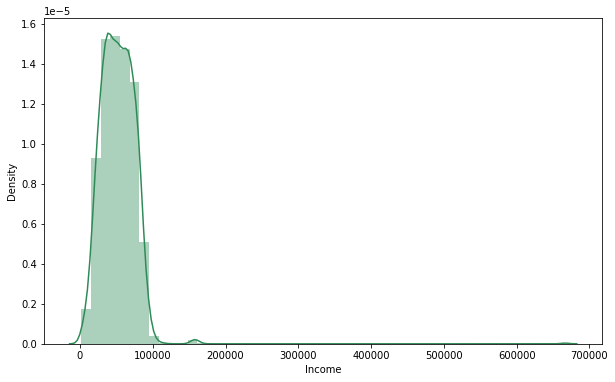

In [44]:
plt.figure(figsize=(10,6))
sns.distplot(customer["Income"],color = 'Seagreen')
plt.show()

In [45]:
customer['AcceptedCmp_total'] = customer['AcceptedCmp1'] + customer['AcceptedCmp2'] + customer['AcceptedCmp3'] + customer['AcceptedCmp4'] + customer['AcceptedCmp5'] + customer['Response']
total_cmp = customer['AcceptedCmp_total'].value_counts()
total_cmp
## 0 = ไม่รับสักอัน, 1 = รับ 1, 2 = รับ 2 ...

0    1631
1     370
2     142
3      51
4      36
5      10
Name: AcceptedCmp_total, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

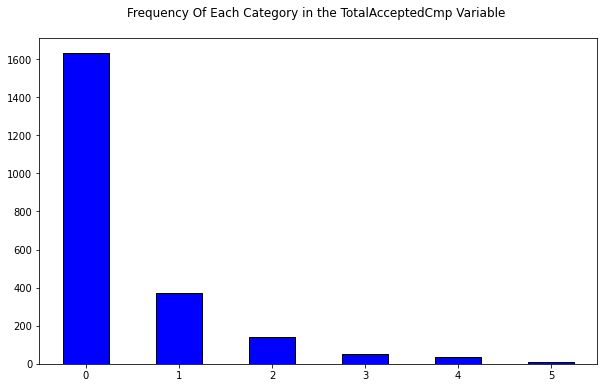

In [46]:
plt.figure(figsize=(10,6))
total_cmp.plot(kind='bar',color = 'blue',edgecolor = "black",linewidth = 1)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n")
plt.xticks(rotation=0)

In [47]:
customer['Purchases_total'] = customer['NumWebPurchases'] + customer['NumCatalogPurchases'] + customer['NumStorePurchases'] + customer['NumDealsPurchases']
customer['Purchases_total'].value_counts()

7     149
5     145
4     128
6     123
17    116
9     102
16    101
19    101
21     95
8      94
20     94
22     94
23     87
10     80
18     79
15     74
12     70
25     68
26     67
11     67
24     56
14     55
13     44
27     39
28     35
29     19
32     12
30     11
31     11
1       4
0       4
34      4
33      4
2       3
44      1
39      1
35      1
37      1
43      1
Name: Purchases_total, dtype: int64

Text(0.5, 1.0, 'Total Purchases')

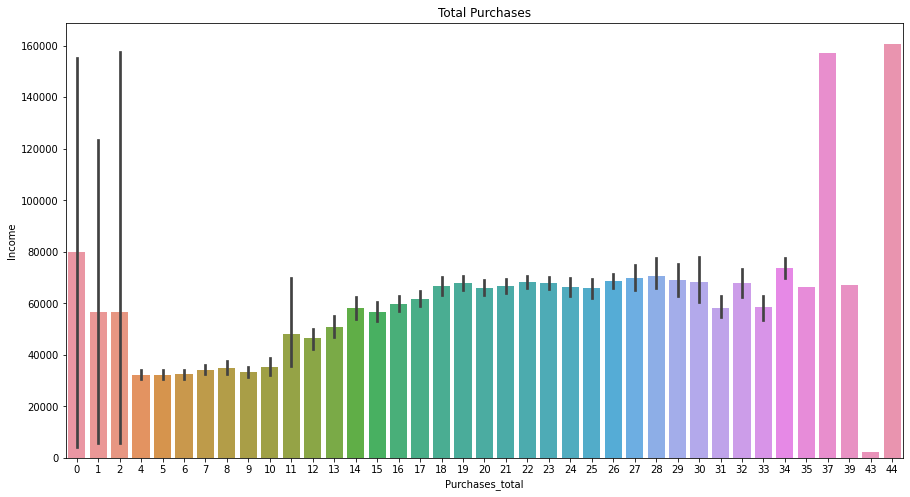

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x='Purchases_total', y='Income', data=customer)
plt.title("Total Purchases")

In [49]:
customer['Purchases_total'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Purchases_total, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


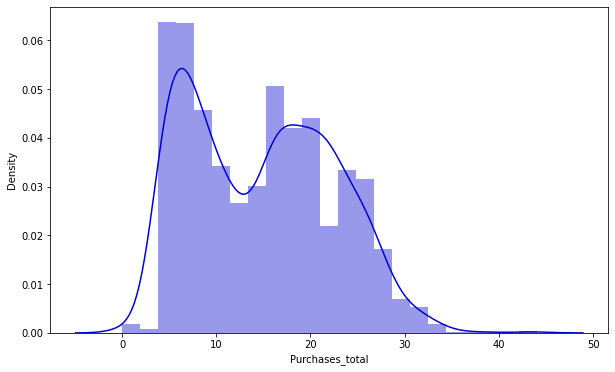

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(customer["Purchases_total"],color = 'mediumblue')
plt.show()

In [51]:
customer['Avg_Purchase'] = round((customer['Purchases'] / customer['Purchases_total']), 1)
customer['Avg_Purchase'].describe()

count    2240.000
mean          inf
std           NaN
min         0.500
25%         9.700
50%        23.450
75%        45.525
max           inf
Name: Avg_Purchase, dtype: float64

Text(0.5, 1.0, 'Marital Status per Income ')

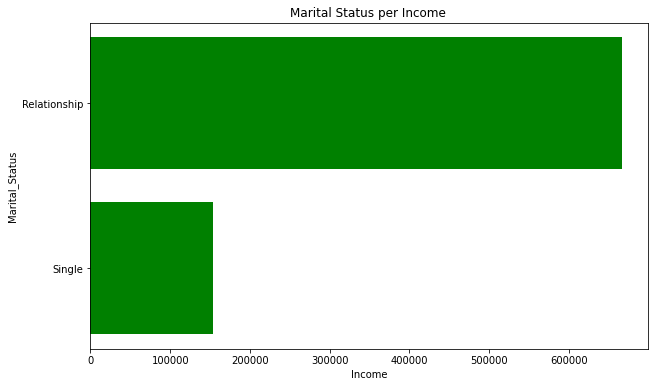

In [52]:
## plot Income VS ทุก feature
plt.figure(figsize=(10,6))
plt.barh(customer["Marital_Status"],customer["Income"],color = 'green')
plt.xlabel("Income")
plt.ylabel("Marital_Status")
plt.title("Marital Status per Income ")

Text(0.5, 1.0, 'Income per Education')

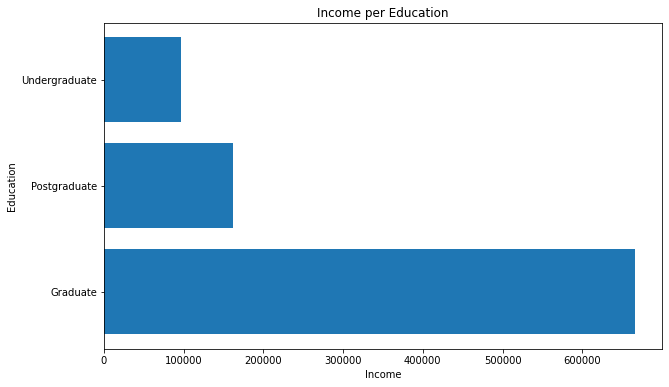

In [53]:
plt.figure(figsize=(10,6))
plt.barh(customer["Education"],customer["Income"])
plt.xlabel("Income")
plt.ylabel("Education")
plt.title("Income per Education")

Text(0.5, 1.0, 'Income per Recency')

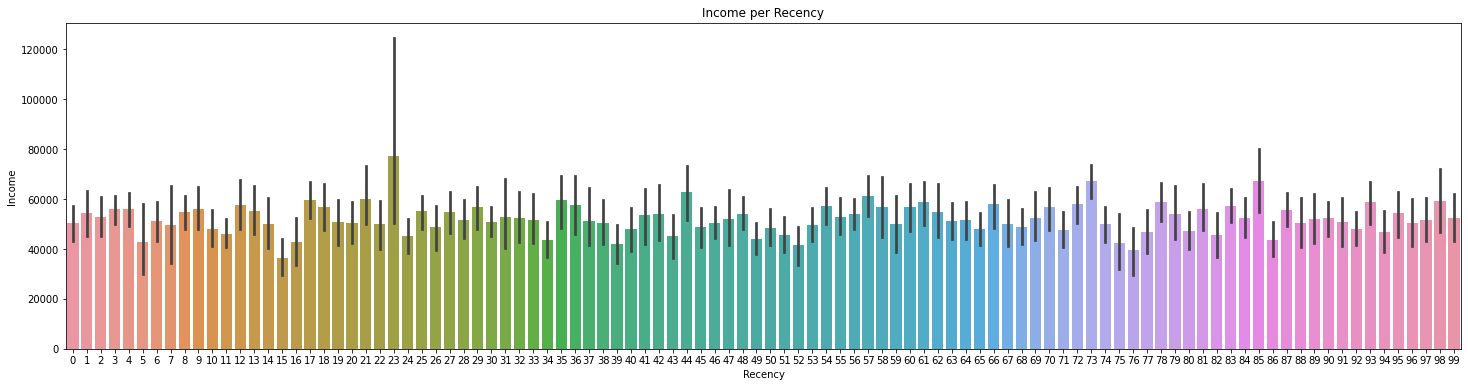

In [54]:
plt.figure(figsize=(25,6))
sns.barplot(x='Recency', y='Income', data=customer)
plt.title("Income per Recency")

Text(0.5, 1.0, 'Income per Number of days as a customer ')

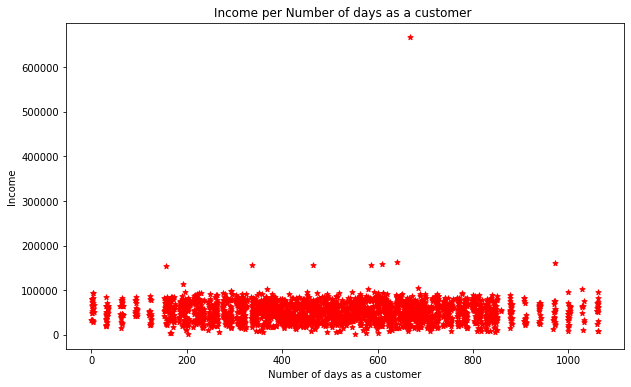

In [55]:
plt.figure(figsize=(10,6))
plt.scatter( customer["Customer_for"],customer["Income"] , label= "stars", color= "red",marker= "*", s=30)
plt.xlabel(" Number of days as a customer ")
plt.ylabel("Income")
plt.title("Income per Number of days as a customer ")


Text(0.5, 1.0, 'Income per Children')

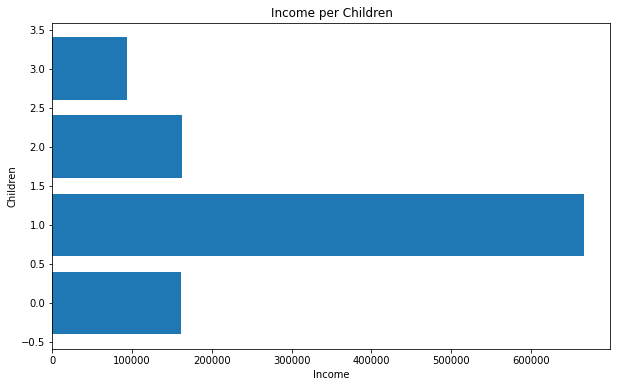

In [56]:
plt.figure(figsize=(10,6))
plt.barh(customer["Children"],customer["Income"])
plt.xlabel("Income")
plt.ylabel("Children")
plt.title("Income per Children")

Text(0.5, 1.0, 'Income per Purchases')

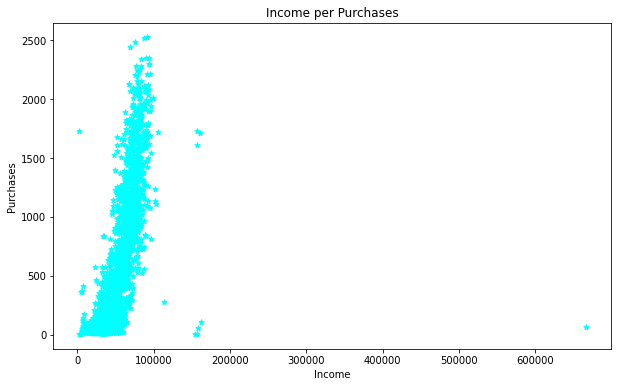

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(customer["Income"],customer["Purchases"], label= "stars", color= "cyan",marker= "*", s=30)
plt.xlabel("Income")
plt.ylabel("Purchases")
plt.title("Income per Purchases")

Text(0.5, 1.0, 'Income per AcceptedCmp total')

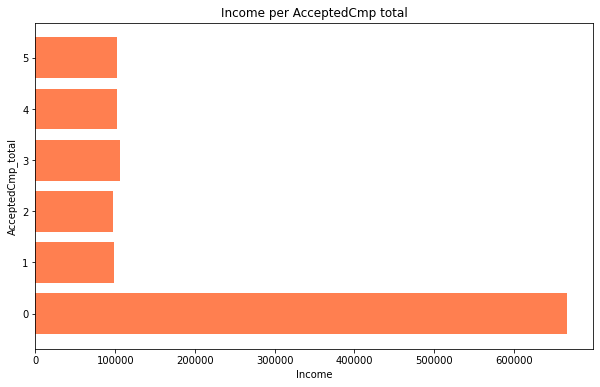

In [58]:
plt.figure(figsize=(10,6))
plt.barh(customer["AcceptedCmp_total"],customer["Income"],color ='coral')
plt.xlabel("Income")
plt.ylabel("AcceptedCmp_total")
plt.title("Income per AcceptedCmp total")

Text(0.5, 1.0, 'Income per Purchases total')

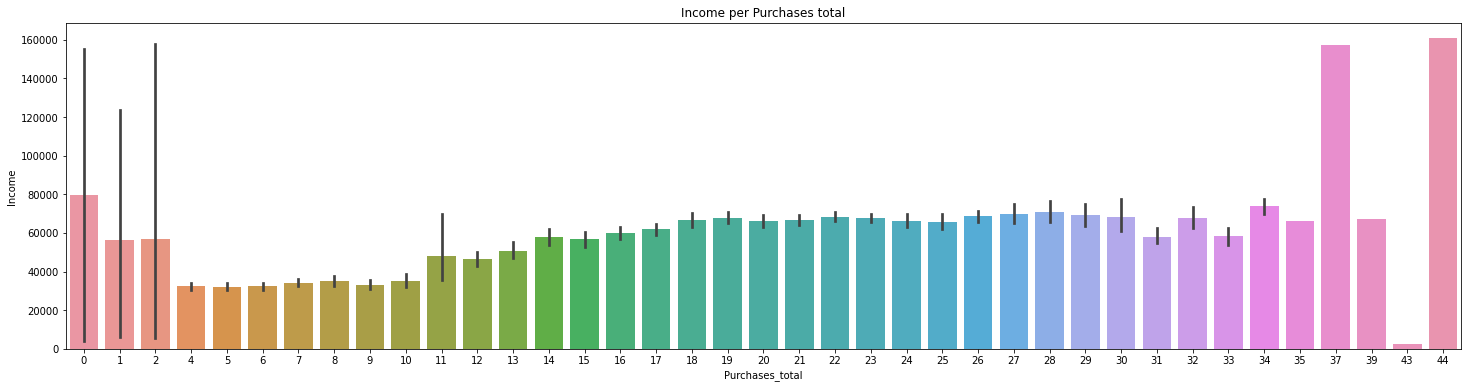

In [59]:
plt.figure(figsize=(25,6))
sns.barplot(x='Purchases_total', y='Income', data=customer)
plt.title("Income per Purchases total")

Text(0, 0.5, 'Marital Status')

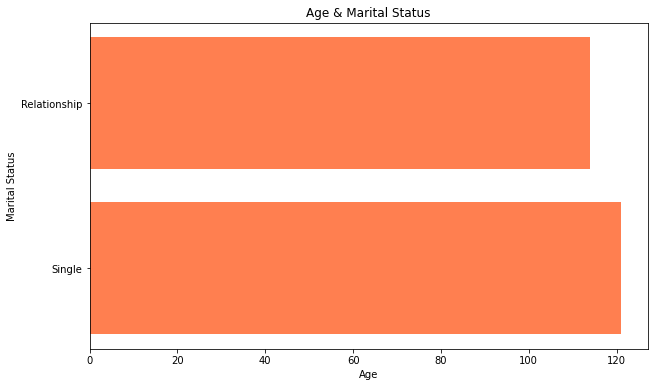

In [60]:
## plot Age VS ทุก feature
plt.figure(figsize=(10,6))
plt.barh(customer['Marital_Status'], customer['Age'],color ='coral')
plt.title('Age & Marital Status')
plt.xlabel('Age')
plt.ylabel('Marital Status')

Text(0, 0.5, 'Age')

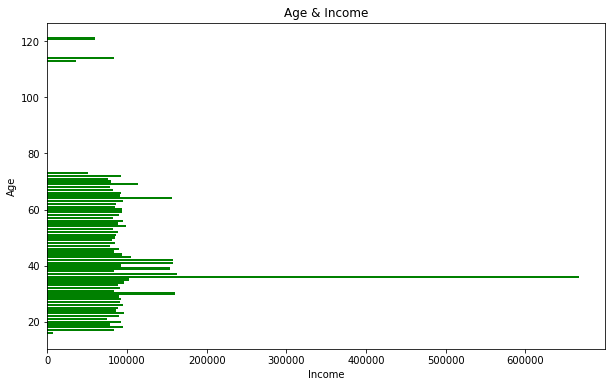

In [61]:
plt.figure(figsize=(10,6))
plt.barh(customer['Age'], customer['Income'],color ='green')
plt.title('Age & Income')
plt.xlabel('Income')
plt.ylabel('Age')

Text(0, 0.5, 'Education')

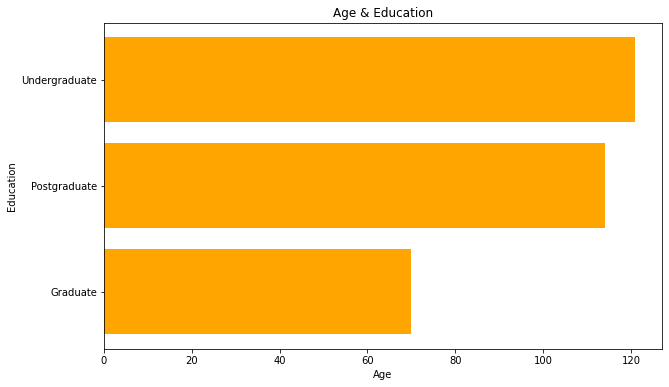

In [62]:
plt.figure(figsize=(10,6))
plt.barh(customer['Education'], customer['Age'], color="orange")
plt.title('Age & Education')
plt.xlabel('Age')
plt.ylabel('Education')

Text(0.5, 1.0, 'Age & Recency')

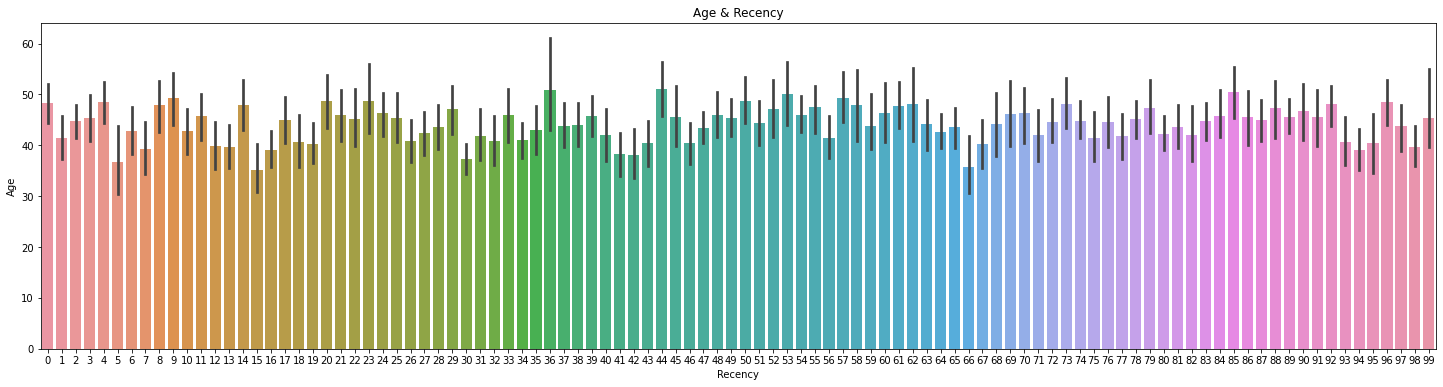

In [63]:
plt.figure(figsize=(25,6))
sns.barplot(x='Recency', y='Age', data=customer)
plt.title('Age & Recency')

Text(0, 0.5, 'Age')

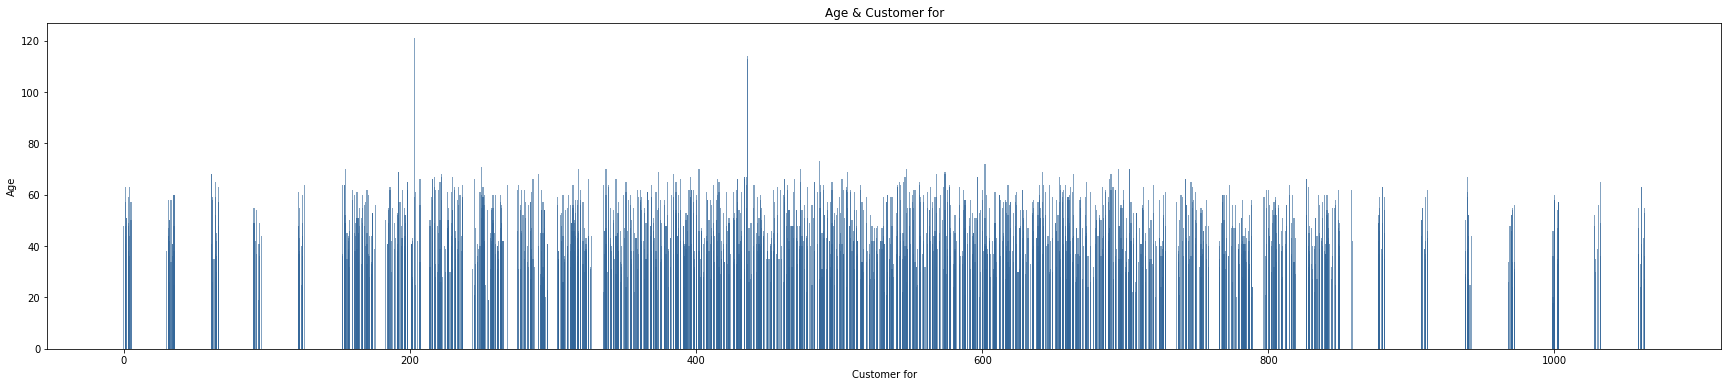

In [64]:
plt.figure(figsize=(30,6))
plt.bar(customer['Customer_for'], customer['Age'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Age & Customer for')
plt.xlabel('Customer for')
plt.ylabel('Age')

Text(0, 0.5, 'Age')

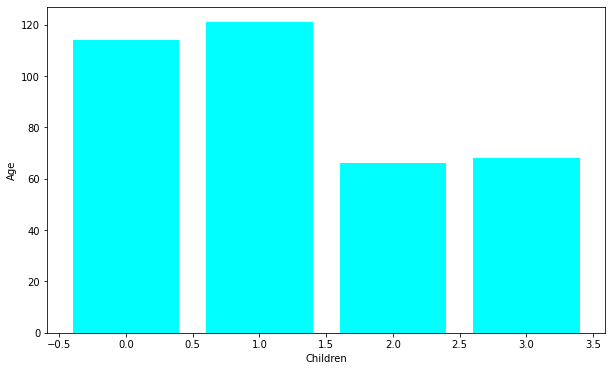

In [65]:
plt.figure(figsize=(10,6))
plt.bar(customer['Children'], customer['Age'], color='cyan')
plt.xlabel('Children')
plt.ylabel('Age')

Text(0.5, 1.0, 'Age & Purchases')

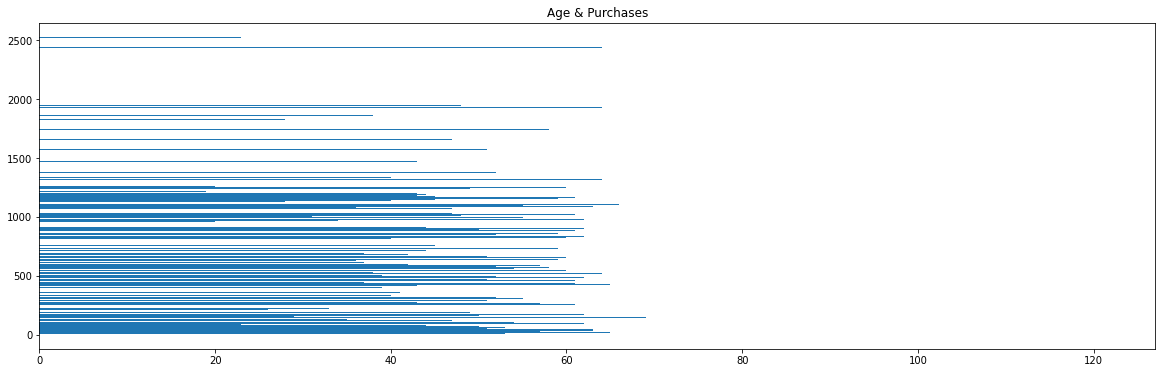

In [66]:
plt.figure(figsize=(20, 6))
plt.barh(customer['Purchases'], customer['Age'])
plt.title('Age & Purchases')

Text(0.5, 1.0, 'Age & Accepted Campaign')

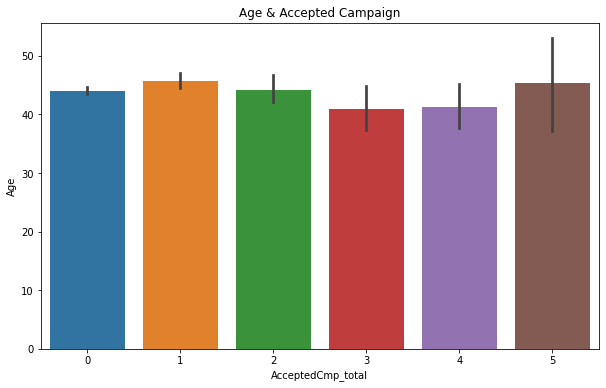

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x='AcceptedCmp_total', y='Age', data=customer)
plt.title('Age & Accepted Campaign')

Text(0.5, 1.0, 'Age & Purchases total')

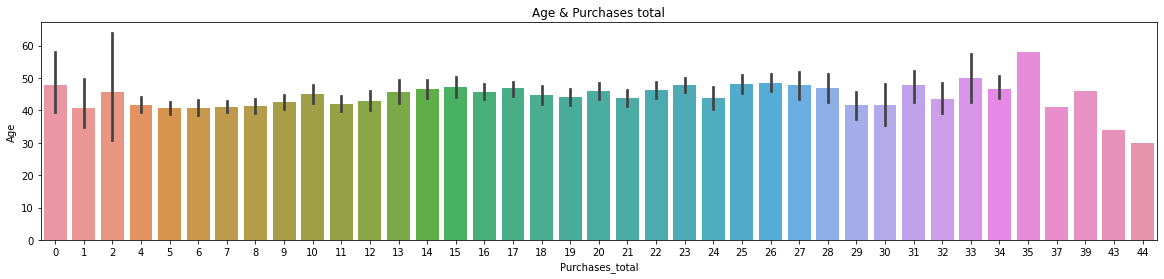

In [68]:
plt.figure(figsize=(20,4))
sns.barplot(x='Purchases_total', y='Age', data=customer)
plt.xticks()
plt.title('Age & Purchases total')

Text(0.5, 1.0, 'Purchases per Children')

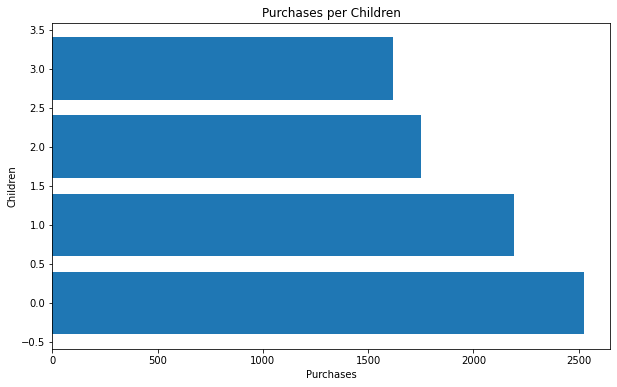

In [69]:
## plot Purchases VS Children 
plt.figure(figsize=(10,6))
plt.barh(customer["Children"],customer["Purchases"])
plt.xlabel("Purchases")
plt.ylabel("Children")
plt.title("Purchases per Children")

Text(0.5, 1.0, 'Purchases per Education')

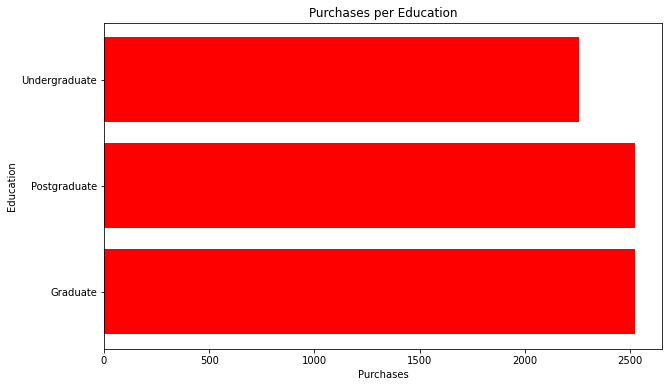

In [70]:
## plot Purchases VS Education 
plt.figure(figsize=(10,6))
plt.barh(customer["Education"],customer["Purchases"],color ='red')
plt.xlabel("Purchases")
plt.ylabel("Education")
plt.title("Purchases per Education")

Text(0.5, 1.0, 'Purchases per Marital Status')

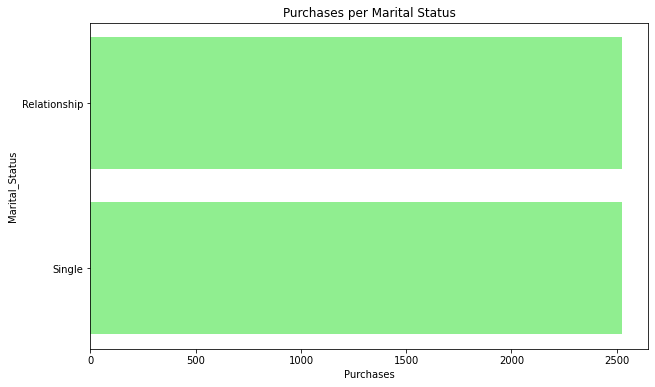

In [71]:
## plot Purchases VS Marital_Status	 
plt.figure(figsize=(10,6))
plt.barh(customer["Marital_Status"],customer["Purchases"],color ='lightgreen')
plt.xlabel("Purchases")
plt.ylabel("Marital_Status")
plt.title("Purchases per Marital Status")

Text(0.5, 1.0, 'Purchases per AcceptedCmp total')

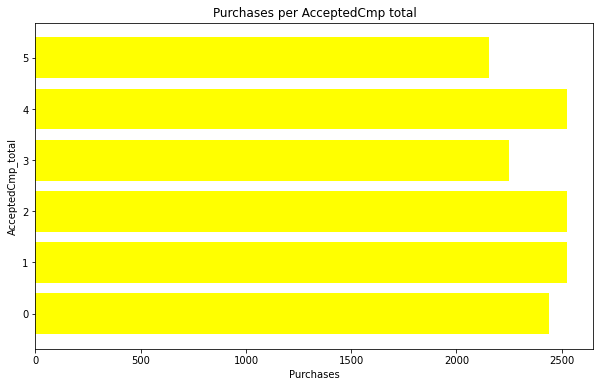

In [72]:
## plot Purchases VS AcceptedCmp_total	 
plt.figure(figsize=(10,6))
plt.barh(customer["AcceptedCmp_total"],customer["Purchases"],color ='yellow')
plt.xlabel("Purchases")
plt.ylabel("AcceptedCmp_total")
plt.title("Purchases per AcceptedCmp total")

Text(0.5, 1.0, 'Purchases per Purchases total')

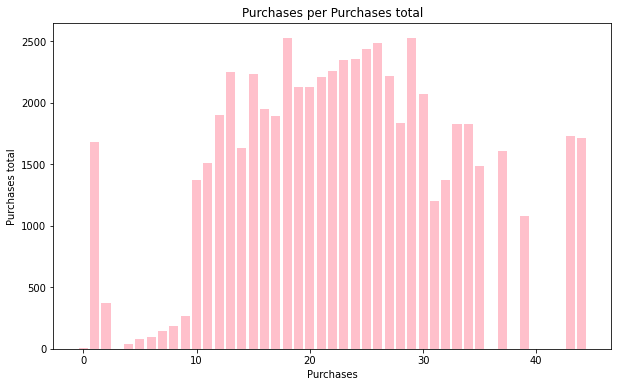

In [73]:
## plot Purchases VS Purchases_total	 
plt.figure(figsize=(10,6))
plt.bar(customer["Purchases_total"],customer["Purchases"],color ='pink')
plt.xlabel("Purchases")
plt.ylabel("Purchases total")
plt.title("Purchases per Purchases total")

Text(0.5, 1.0, 'Marital Status per AcceptedCmp total')

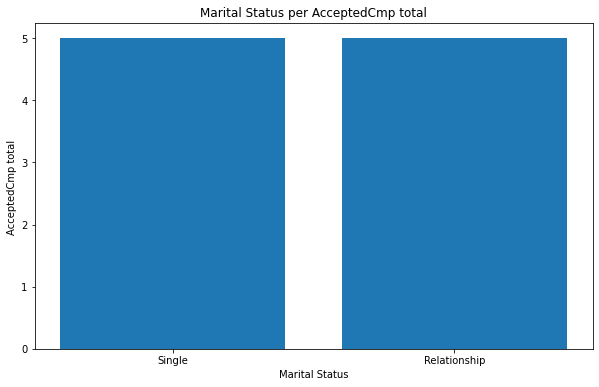

In [74]:
## plot AcceptedCmp_total VS Marital_Status	 
plt.figure(figsize=(10,6))
plt.bar(customer["Marital_Status"],customer["AcceptedCmp_total"])
plt.xlabel("Marital Status")
plt.ylabel("AcceptedCmp total ")
plt.title("Marital Status per AcceptedCmp total")


Text(0.5, 1.0, 'Marital Status per Purchases total')

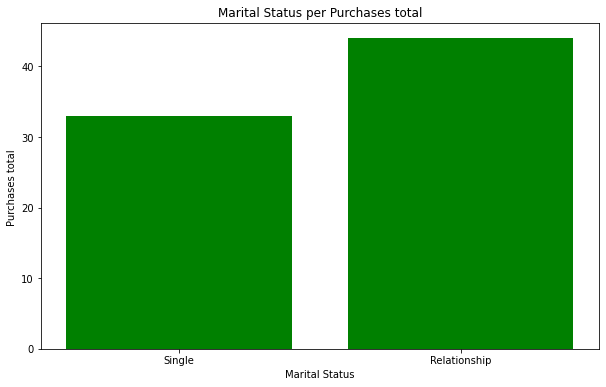

In [75]:
## plot Purchases_total VS Marital_Status	 
plt.figure(figsize=(10,6))
plt.bar(customer["Marital_Status"],customer["Purchases_total"],color='green')
plt.xlabel("Marital Status")
plt.ylabel("Purchases total ")
plt.title("Marital Status per Purchases total")

Text(0.5, 1.0, 'AcceptedCmp total per Purchases total')

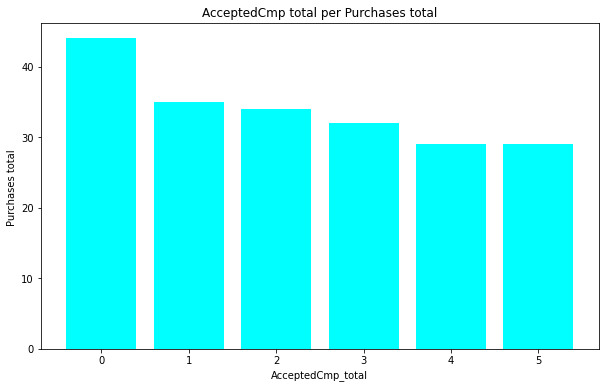

In [76]:
## plot AcceptedCmp_total VS Purchases_total	 
plt.figure(figsize=(10,6))
plt.bar(customer["AcceptedCmp_total"],customer["Purchases_total"],color='cyan')
plt.xlabel("AcceptedCmp_total")
plt.ylabel("Purchases total ")
plt.title("AcceptedCmp total per Purchases total")

In [77]:
customer.groupby('Education').describe()

ID                            ... Avg_Purchase                
                count         mean          std  ...          50%     75%     max
Education                                        ...                             
Graduate       1127.0  5652.523514  3302.806089  ...        24.40  50.350     inf
Postgraduate    856.0  5525.970794  3179.153962  ...        25.25  52.825     inf
Undergraduate   257.0  5547.910506  3228.305746  ...        12.20  34.200  1679.0

[3 rows x 248 columns]

In [78]:
customer.groupby('Age').describe()

ID                                      ... Avg_Purchase                        
    count          mean          std      min  ...          25%     50%      75%    max
Age                                            ...                                     
16    1.0   9909.000000          NaN   9909.0  ...       12.200   12.20   12.200   12.2
17    2.0   4044.000000   541.643794   3661.0  ...       55.475   62.15   68.825   75.5
18    3.0   5905.666667  5284.351364    193.0  ...       25.900   47.80   79.200  110.6
19    4.0   7945.250000  2204.552165   5184.0  ...        5.800   22.90   43.825   55.3
20    7.0   4421.285714  2368.161996    821.0  ...       45.600   64.60   69.800   94.4
..    ...           ...          ...      ...  ...          ...     ...      ...    ...
72    1.0   6932.000000          NaN   6932.0  ...       96.300   96.30   96.300   96.3
73    1.0   6663.000000          NaN   6663.0  ...       17.400   17.40   17.400   17.4
113   1.0   7829.000000          NaN   7829.0  ...       10.800   10.80   10.800   10.8
114   1.0   1150.000000          NaN   1150.0  ...      123.500  123.50  123.500  123.5
121   1.0  11004.000000          NaN  11004.0  ...        5.500    5.50    5.500    5.5

[61 rows x 240 columns]

In [79]:
customer.groupby('Marital_Status').describe()

ID                            ... Avg_Purchase             
                 count         mean          std  ...          50%     75%  max
Marital_Status                                    ...                          
Relationship    1444.0  5637.780471  3243.258885  ...        23.40  43.025  inf
Single           796.0  5509.400754  3253.233279  ...        23.55  52.625  inf

[2 rows x 248 columns]

## **3. Data Preprocessing & Representing Data**

## Data Transforming

In [80]:
customer

ID  Year_Birth  ... Purchases_total Avg_Purchase
0      5524        1957  ...              25         64.7
1      2174        1954  ...               6          4.5
2      4141        1965  ...              21         37.0
3      6182        1984  ...               8          6.6
4      5324        1981  ...              19         22.2
...     ...         ...  ...             ...          ...
2235  10870        1967  ...              18         74.5
2236   4001        1946  ...              22         20.2
2237   7270        1981  ...              19         65.3
2238   8235        1956  ...              23         36.7
2239   9405        1954  ...              11         15.6

[2240 rows x 34 columns]

In [81]:
drop_col = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Recency', 'Avg_Purchase', 'Response', 'Complain']
customer_final = customer.drop(drop_col, axis = 1)
customer_final

Education Marital_Status  ...  AcceptedCmp_total  Purchases_total
0         Graduate         Single  ...                  1               25
1         Graduate         Single  ...                  0                6
2         Graduate   Relationship  ...                  0               21
3         Graduate   Relationship  ...                  0                8
4     Postgraduate   Relationship  ...                  0               19
...            ...            ...  ...                ...              ...
2235      Graduate   Relationship  ...                  0               18
2236  Postgraduate   Relationship  ...                  1               22
2237      Graduate         Single  ...                  1               19
2238  Postgraduate   Relationship  ...                  0               23
2239  Postgraduate   Relationship  ...                  1               11

[2240 rows x 9 columns]

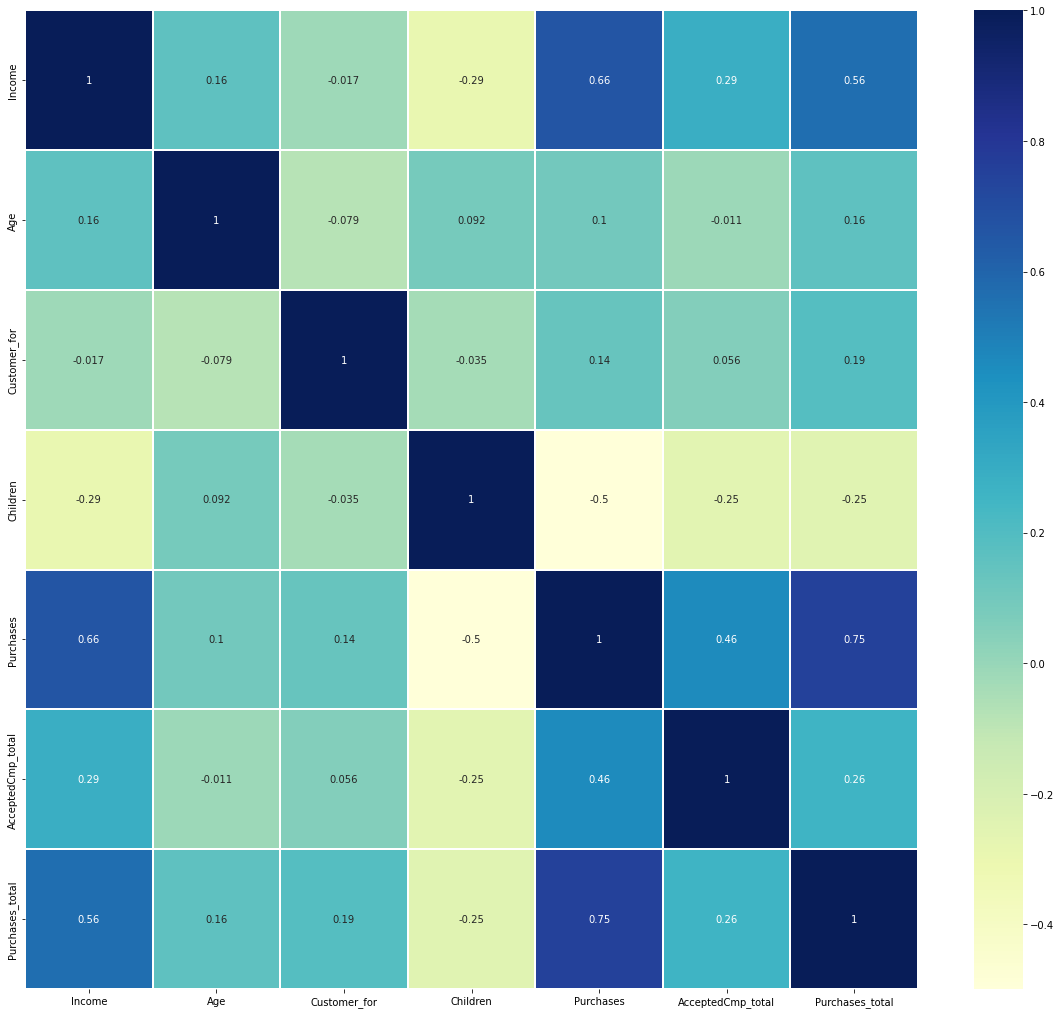

In [82]:
plt.figure(figsize=(20,18))
sns.heatmap(customer_final.corr(), annot=True,cmap = 'YlGnBu',linewidths=1)
plt.show()

In [83]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Age                2240 non-null   int64  
 4   Customer_for       2240 non-null   int64  
 5   Children           2240 non-null   int64  
 6   Purchases          2240 non-null   int64  
 7   AcceptedCmp_total  2240 non-null   int64  
 8   Purchases_total    2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


In [84]:
customer_final.isnull().any()

Education            False
Marital_Status       False
Income               False
Age                  False
Customer_for         False
Children             False
Purchases            False
AcceptedCmp_total    False
Purchases_total      False
dtype: bool

## Outlier Detecting


---



In [85]:
customer_final['Income'] = np.where(customer_final['Income'] > 600000, 600000, customer_final['Income'])
customer_final['Age'] = np.where(customer_final['Age'] > 90, 90, customer_final['Age'])

customer_final

Education Marital_Status  ...  AcceptedCmp_total  Purchases_total
0         Graduate         Single  ...                  1               25
1         Graduate         Single  ...                  0                6
2         Graduate   Relationship  ...                  0               21
3         Graduate   Relationship  ...                  0                8
4     Postgraduate   Relationship  ...                  0               19
...            ...            ...  ...                ...              ...
2235      Graduate   Relationship  ...                  0               18
2236  Postgraduate   Relationship  ...                  1               22
2237      Graduate         Single  ...                  1               19
2238  Postgraduate   Relationship  ...                  0               23
2239  Postgraduate   Relationship  ...                  1               11

[2240 rows x 9 columns]

## Engineering Features

---



In [86]:
customer_final.dtypes

Education             object
Marital_Status        object
Income               float64
Age                    int64
Customer_for           int64
Children               int64
Purchases              int64
AcceptedCmp_total      int64
Purchases_total        int64
dtype: object

In [87]:
customer_final.shape

(2240, 9)

In [88]:
customer_final.keys()

Index(['Education', 'Marital_Status', 'Income', 'Age', 'Customer_for',
       'Children', 'Purchases', 'AcceptedCmp_total', 'Purchases_total'],
      dtype='object')

In [89]:
from sklearn.preprocessing import LabelEncoder

customer_encoded = customer_final.copy()

encoder = LabelEncoder()
customer_encoded['Education'] = customer_encoded[['Education']].apply(encoder.fit_transform)
customer_encoded['Marital_Status'] = customer_encoded[['Marital_Status']].apply(encoder.fit_transform)

customer_encoded['Income'] = customer_encoded['Income'].astype('int')

In [90]:
customer_encoded.dtypes

Education            int64
Marital_Status       int64
Income               int64
Age                  int64
Customer_for         int64
Children             int64
Purchases            int64
AcceptedCmp_total    int64
Purchases_total      int64
dtype: object

## Feature scaling

---



In [91]:
from sklearn.preprocessing import StandardScaler

customer_scaling = customer_encoded.copy()

scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_scaling)
customer_scaled = pd.DataFrame(customer_scaled, columns = customer_scaling.columns)
customer_scaled

Education  Marital_Status  ...  AcceptedCmp_total  Purchases_total
0     -0.894974        1.346874  ...           0.621248         1.320826
1     -0.894974        1.346874  ...          -0.501912        -1.154596
2     -0.894974       -0.742460  ...          -0.501912         0.799685
3     -0.894974       -0.742460  ...          -0.501912        -0.894025
4      0.568341       -0.742460  ...          -0.501912         0.539114
...         ...             ...  ...                ...              ...
2235  -0.894974       -0.742460  ...          -0.501912         0.408829
2236   0.568341       -0.742460  ...           0.621248         0.929970
2237  -0.894974        1.346874  ...           0.621248         0.539114
2238   0.568341       -0.742460  ...          -0.501912         1.060255
2239   0.568341       -0.742460  ...           0.621248        -0.503169

[2240 rows x 9 columns]

## Dimensionally Reduction by using PCA 

---



In [144]:
from sklearn.decomposition import PCA

RANDOM_STATE = 20
ratio = []

for i in range(1,10):
  pca = PCA(n_components = i, random_state=RANDOM_STATE)
  customer_pca = pca.fit_transform(customer_scaled)
  ratio.append(pca.explained_variance_ratio_.sum()*100)

pca_components = pd.DataFrame(np.arange(1,10), columns=['n_components'])
pca_ratio = pd.DataFrame(ratio, columns=['variance_ratio(%)'])
pca_components = pd.concat([pca_components, pca_ratio], axis=1)
pca_components

n_components  variance_ratio(%)
0             1          31.733424
1             2          44.756628
2             3          56.378952
3             4          67.400364
4             5          78.173063
5             6          86.558807
6             7          93.877155
7             8          98.199339
8             9         100.000000

In [145]:
pca = PCA(n_components = 9, random_state=RANDOM_STATE)
customer_pca = pca.fit_transform(customer_scaled)

print('n_components =', pca.n_components_)
print('Percentage of explained variance with 9 components is {:.1f}'.format(pca.explained_variance_ratio_.sum()*100), '%')

n_components = 9
Percentage of explained variance with 9 components is 100.0 %


In [146]:
customer_pca = pd.DataFrame(customer_pca)
customer_pca

0         1         2  ...         6         7         8
0     2.664568 -0.477647 -0.039835  ... -1.255402 -0.398818 -0.276639
1    -1.783606  2.128529  1.824187  ...  0.131352  0.268713 -0.220387
2     1.224657  0.531644 -0.199092  ... -0.646463  0.027615  0.522945
3    -1.881068  0.024295  1.030333  ...  0.307713 -0.607415  0.013539
4    -0.196643 -0.145438 -0.283857  ...  1.010353 -0.267538  0.449190
...        ...       ...       ...  ...       ...       ...       ...
2235  0.928402  0.607056 -0.594133  ...  0.053023 -0.133540 -0.804875
2236 -0.221852  3.251590 -0.320320  ...  1.537765 -0.577481  0.209215
2237  1.469107 -0.792400  1.978378  ...  0.107076 -0.571499 -0.173733
2238  0.849738  1.543468 -0.586053  ...  0.209327 -0.342397  0.212272
2239 -0.714416  0.652684 -1.474622  ... -0.186607  0.722625  0.134139

[2240 rows x 9 columns]

In [147]:
customer_pca.describe().T

count          mean       std  ...       50%       75%        max
0  2240.0  8.376236e-18  1.690350  ... -0.268738  1.332952   9.715538
1  2240.0  5.372686e-17  1.082872  ...  0.054840  0.786034   4.413421
2  2240.0  3.905606e-17  1.022974  ... -0.034359  0.667587   3.226838
3  2240.0 -1.613757e-17  0.996178  ... -0.075952  0.728881   3.261968
4  2240.0 -2.230359e-17  0.984874  ... -0.082151  0.666810   3.014621
5  2240.0  4.113773e-17  0.868938  ... -0.117629  0.437312   4.309852
6  2240.0 -1.360519e-17  0.811755  ...  0.010219  0.534169   6.732957
7  2240.0  1.610815e-17  0.623835  ...  0.004290  0.281724  17.649635
8  2240.0 -2.089103e-17  0.402656  ...  0.035504  0.239941   4.862115

[9 rows x 8 columns]

In [148]:
principle_1st = customer_pca.iloc[:,0]
principle_2nd = customer_pca.iloc[:,1]
principle_3rd = customer_pca.iloc[:,2]

print(principle_1st, principle_2nd, principle_3rd)

0       2.664568
1      -1.783606
2       1.224657
3      -1.881068
4      -0.196643
          ...   
2235    0.928402
2236   -0.221852
2237    1.469107
2238    0.849738
2239   -0.714416
Name: 0, Length: 2240, dtype: float64 0      -0.477647
1       2.128529
2       0.531644
3       0.024295
4      -0.145438
          ...   
2235    0.607056
2236    3.251590
2237   -0.792400
2238    1.543468
2239    0.652684
Name: 1, Length: 2240, dtype: float64 0      -0.039835
1       1.824187
2      -0.199092
3       1.030333
4      -0.283857
          ...   
2235   -0.594133
2236   -0.320320
2237    1.978378
2238   -0.586053
2239   -1.474622
Name: 2, Length: 2240, dtype: float64


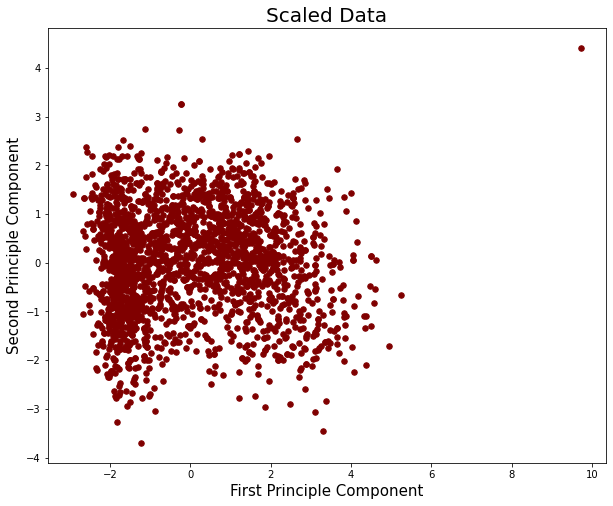

In [149]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(principle_1st, principle_2nd, c="maroon", s=30, cmap='viridis')
plt.title('Scaled Data', fontsize=20)
plt.xlabel('First Principle Component', fontsize=15)
plt.ylabel('Second Principle Component', fontsize=15)
plt.show() 

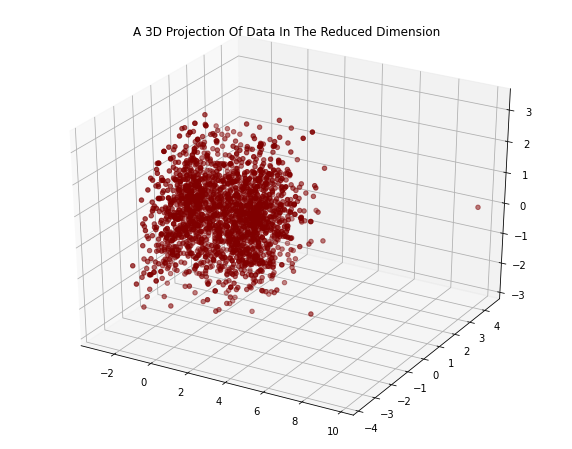

In [150]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(principle_1st, principle_2nd, principle_3rd, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **4. Modeling**

## K-Means Clustering

---



In [151]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=100,
                  random_state=RANDOM_STATE)
  kmeans.fit(customer_pca)
  wcss.append(kmeans.inertia_)
wcss

[20159.999999999993,
 15307.931026262926,
 13884.530332364322,
 12697.964875713757,
 11844.292100553228,
 11090.089941605842,
 10552.006563561554,
 10065.696555222083,
 9590.95246541001,
 9217.240497039806]

In [152]:
pip install git+https://github.com/arvkevi/kneed

  Cloning https://github.com/arvkevi/kneed to /tmp/pip-req-build-a4dx5uz1
  Running command git clone -q https://github.com/arvkevi/kneed /tmp/pip-req-build-a4dx5uz1


In [153]:
#Elbow method หา k cluster ที่มีการ drop ค่า RSS มากที่สุด
from kneed import KneeLocator

kn = KneeLocator(np.arange(1,11), wcss, curve='convex', direction='decreasing')
elbow_point = kn.elbow

#แสดง elbow point 
print('The elbow point is ', elbow_point)

The elbow point is  3


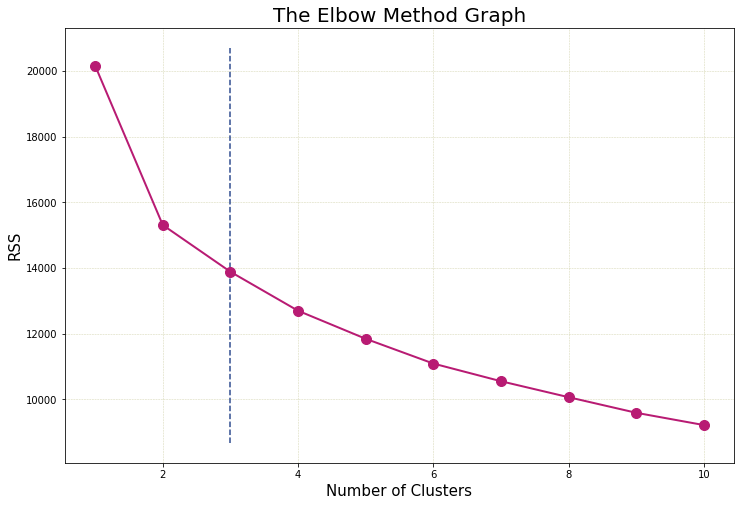

In [154]:
plt.figure(figsize=(12,8))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
#Plot RSS ของแต่ละ k clusters
plt.plot(np.arange(1,11), wcss, linewidth=2, marker='o', ms=10, color='#B81B73')
#Plot elbow point = 3
plt.vlines(elbow_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='#2D4A8F')

plt.title('The Elbow Method Graph', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('RSS', fontsize=15)
plt.show()

In [155]:
kmeans = KMeans(n_clusters = 3, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(customer_pca)

KMeans(n_clusters=3, n_init=100, random_state=20)

In [156]:
print("Cluster membership:\n {}".format(kmeans.labels_))

Cluster membership:
 [1 0 1 ... 1 1 0]


In [157]:
labels_kmeans = kmeans.predict(customer_pca)
customer_pca['Cluster_kmeans'] = labels_kmeans
customer_pca

0         1         2  ...         7         8  Cluster_kmeans
0     2.664568 -0.477647 -0.039835  ... -0.398818 -0.276639               1
1    -1.783606  2.128529  1.824187  ...  0.268713 -0.220387               0
2     1.224657  0.531644 -0.199092  ...  0.027615  0.522945               1
3    -1.881068  0.024295  1.030333  ... -0.607415  0.013539               0
4    -0.196643 -0.145438 -0.283857  ... -0.267538  0.449190               1
...        ...       ...       ...  ...       ...       ...             ...
2235  0.928402  0.607056 -0.594133  ... -0.133540 -0.804875               1
2236 -0.221852  3.251590 -0.320320  ... -0.577481  0.209215               1
2237  1.469107 -0.792400  1.978378  ... -0.571499 -0.173733               1
2238  0.849738  1.543468 -0.586053  ... -0.342397  0.212272               1
2239 -0.714416  0.652684 -1.474622  ...  0.722625  0.134139               0

[2240 rows x 10 columns]

In [158]:
print("Clusters present: {}".format(np.unique(labels_kmeans)))
print("Cluster sizes KMeans clustering: {}".format(np.bincount(labels_kmeans)))

Clusters present: [0 1 2]
Cluster sizes KMeans clustering: [1125  862  253]


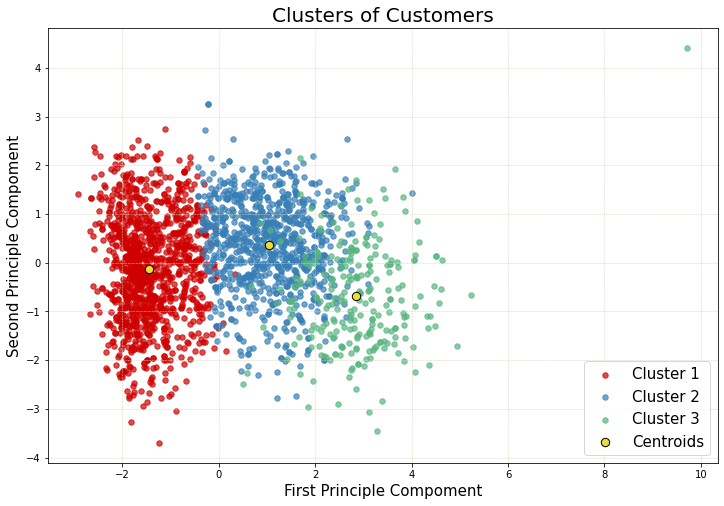

In [159]:
plt.figure(figsize=(12,8))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
#Plot cluster 1
plt.scatter(customer_pca.loc[customer_pca['Cluster_kmeans']==0][0], customer_pca.loc[customer_pca['Cluster_kmeans']==0][1], s=30, c='#CF0000', label='Cluster 1', alpha=0.7)
#Plot cluster 2
plt.scatter(customer_pca.loc[customer_pca['Cluster_kmeans']==1][0], customer_pca.loc[customer_pca['Cluster_kmeans']==1][1], s=30, c='#377FB6', label='Cluster 2', alpha=0.7)
#Plot cluster 3
plt.scatter(customer_pca.loc[customer_pca['Cluster_kmeans']==2][0], customer_pca.loc[customer_pca['Cluster_kmeans']==2][1], s=30, c='#56B57F', label='Cluster 3', alpha=0.7)

#Plot Centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='#F0DA39', label='Centroids', edgecolors='black')
plt.title('Clusters of Customers', fontsize=20)
plt.xlabel('First Principle Compoment', fontsize=15)
plt.ylabel('Second Principle Compoment', fontsize=15)
plt.legend(fontsize=15)
plt.show()

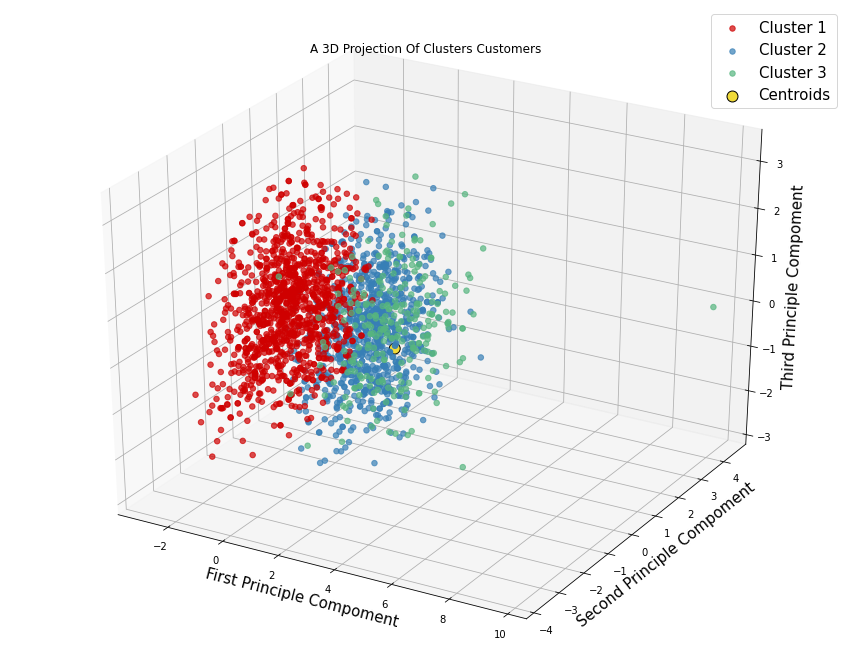

In [160]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(customer_pca.loc[customer_pca['Cluster_kmeans']==0][0], customer_pca.loc[customer_pca['Cluster_kmeans']==0][1]
           , customer_pca.loc[customer_pca['Cluster_kmeans']==0][2], s=30, c='#CF0000', label='Cluster 1', alpha=0.7, marker="o")
ax.scatter(customer_pca.loc[customer_pca['Cluster_kmeans']==1][0], customer_pca.loc[customer_pca['Cluster_kmeans']==1][1]
           , customer_pca.loc[customer_pca['Cluster_kmeans']==1][2], s=30, c='#377FB6', label='Cluster 2', alpha=0.7, marker="o")
ax.scatter(customer_pca.loc[customer_pca['Cluster_kmeans']==2][0], customer_pca.loc[customer_pca['Cluster_kmeans']==2][1]
           , customer_pca.loc[customer_pca['Cluster_kmeans']==2][2], s=30, c='#56B57F', label='Cluster 3', alpha=0.7, marker="o")

ax.set_title("A 3D Projection Of Clusters Customers")
#Plot Centroids
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=120, c='#F0DA39', label='Centroids', edgecolors='black')
ax.set_xlabel('First Principle Compoment', fontsize=15)
ax.set_ylabel('Second Principle Compoment', fontsize=15)
ax.set_zlabel('Third Principle Compoment', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [161]:
customer_kmeans = pd.concat([customer_final, pd.DataFrame({'Cluster' : labels_kmeans})], axis=1)
customer_kmeans

Education Marital_Status  ...  Purchases_total  Cluster
0         Graduate         Single  ...               25        1
1         Graduate         Single  ...                6        0
2         Graduate   Relationship  ...               21        1
3         Graduate   Relationship  ...                8        0
4     Postgraduate   Relationship  ...               19        1
...            ...            ...  ...              ...      ...
2235      Graduate   Relationship  ...               18        1
2236  Postgraduate   Relationship  ...               22        1
2237      Graduate         Single  ...               19        1
2238  Postgraduate   Relationship  ...               23        1
2239  Postgraduate   Relationship  ...               11        0

[2240 rows x 10 columns]

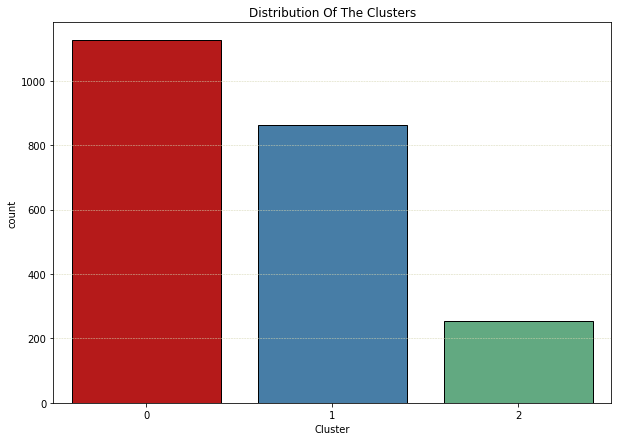

In [162]:
cl = ['#CF0000', '#377FB6', '#56B57F']
plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.countplot(x = customer_kmeans["Cluster"], palette= cl, ec='k')
pl.set_title("Distribution Of The Clusters")
plt.show()

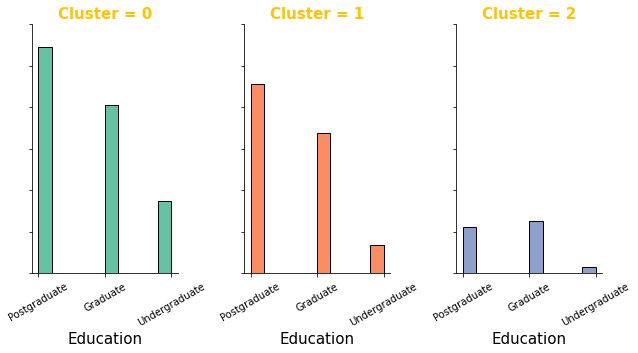

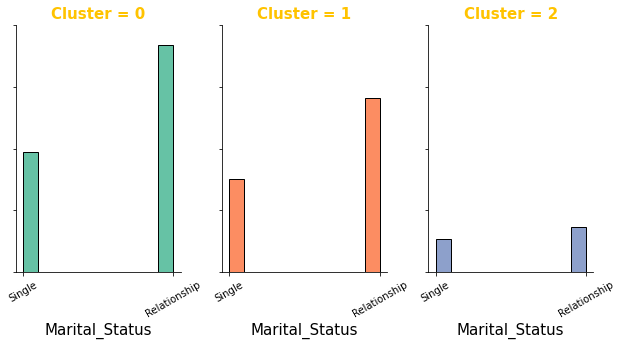

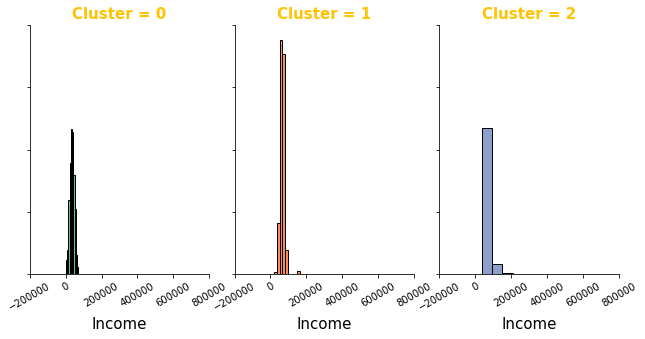

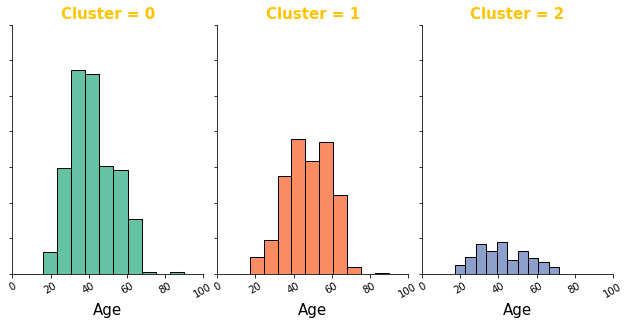

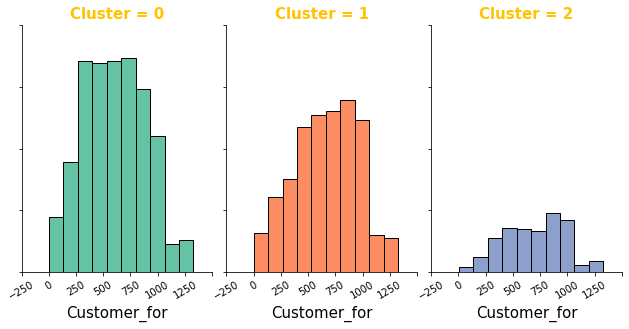

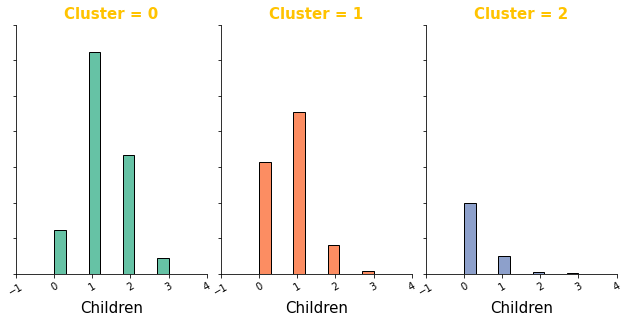

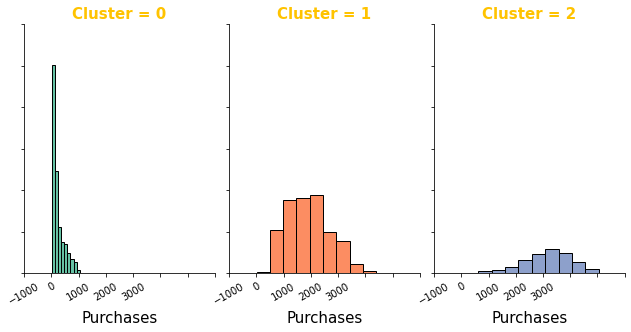

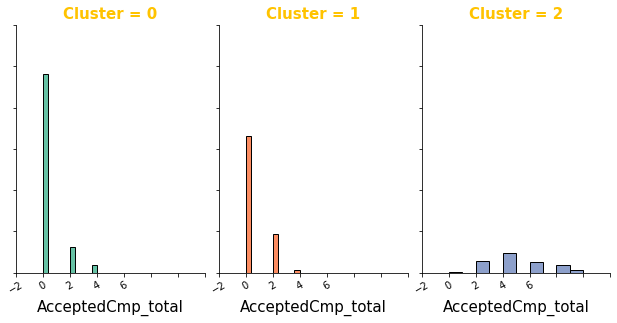

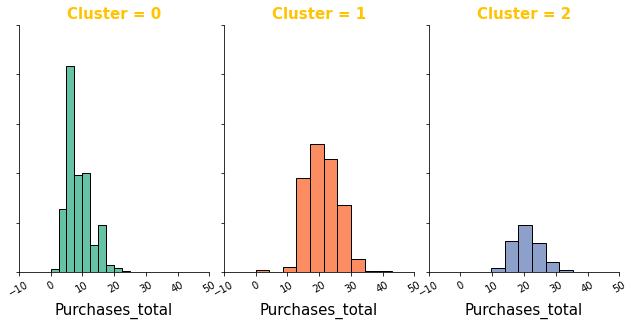

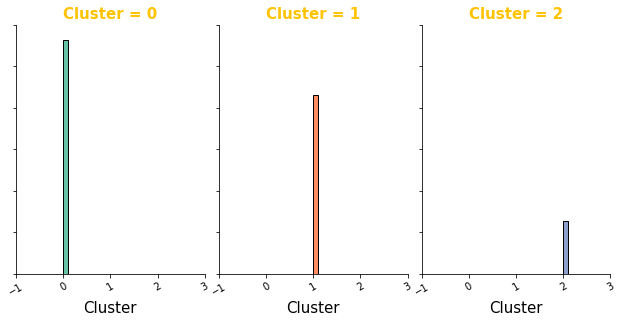

In [163]:
for i in customer_kmeans:
  x = sns.FacetGrid(customer_kmeans, col='Cluster', hue='Cluster', palette='Set2')
  x.map(plt.hist, i, bins=10, ec='k') 
  x.set_xticklabels(rotation=30, color='black')
  x.set_yticklabels(color='black')
  x.set_xlabels(size=15, color='black')
  x.set_titles(size=15, color='#FFC300', fontweight='bold')
  x.fig.set_figheight(5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


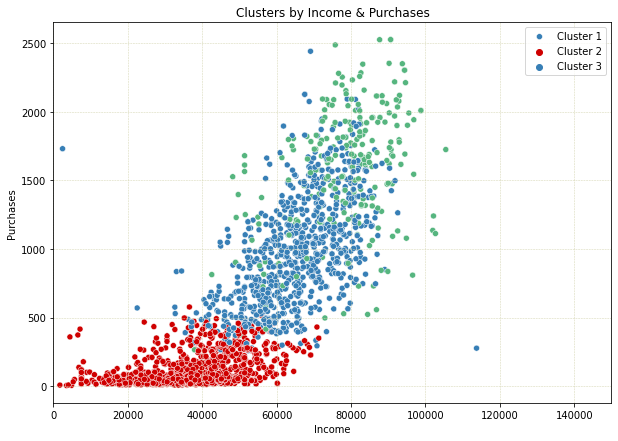

In [164]:
plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.scatterplot(customer_kmeans["Income"], customer_kmeans["Purchases"], hue = customer_kmeans["Cluster"], palette= cl, data=customer_kmeans)
pl.set_title("Clusters by Income & Purchases")
pl.set_xlim(xmin=0, xmax=150000)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


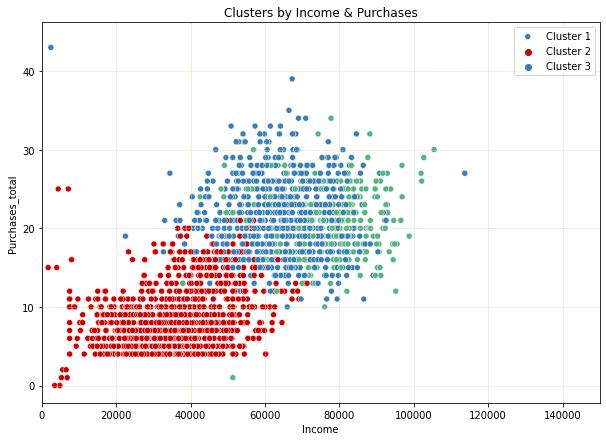

In [165]:
plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.scatterplot(customer_kmeans["Income"], customer_kmeans["Purchases_total"], hue = customer_kmeans["Cluster"], palette= cl, data=customer_kmeans)
pl.set_title("Clusters by Income & Purchases")
pl.set_xlim(xmin=0, xmax=150000)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


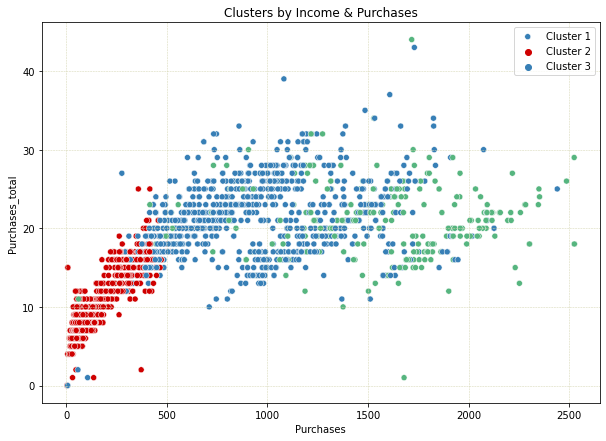

In [166]:
plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.scatterplot(customer_kmeans["Purchases"], customer_kmeans["Purchases_total"], hue = customer_kmeans["Cluster"], palette= cl, data=customer_kmeans)
pl.set_title("Clusters by Income & Purchases")
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

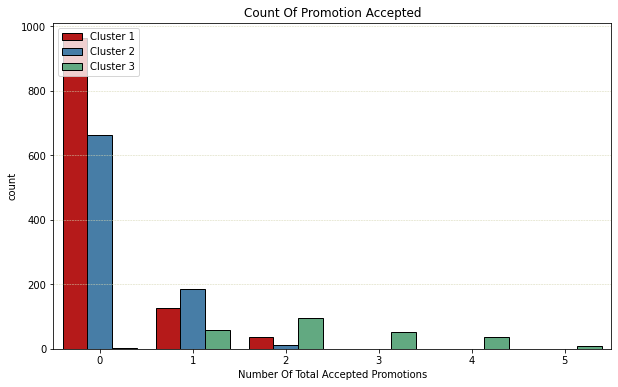

In [167]:
plt.figure(figsize=(10,6))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.countplot(x=customer_kmeans["AcceptedCmp_total"],hue=customer_kmeans["Cluster"], palette= cl, ec='k')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

## Agglomerative Clustering

---



In [168]:
customer_pca = customer_pca.iloc[:, 0:9]
customer_pca

0         1         2  ...         6         7         8
0     2.664568 -0.477647 -0.039835  ... -1.255402 -0.398818 -0.276639
1    -1.783606  2.128529  1.824187  ...  0.131352  0.268713 -0.220387
2     1.224657  0.531644 -0.199092  ... -0.646463  0.027615  0.522945
3    -1.881068  0.024295  1.030333  ...  0.307713 -0.607415  0.013539
4    -0.196643 -0.145438 -0.283857  ...  1.010353 -0.267538  0.449190
...        ...       ...       ...  ...       ...       ...       ...
2235  0.928402  0.607056 -0.594133  ...  0.053023 -0.133540 -0.804875
2236 -0.221852  3.251590 -0.320320  ...  1.537765 -0.577481  0.209215
2237  1.469107 -0.792400  1.978378  ...  0.107076 -0.571499 -0.173733
2238  0.849738  1.543468 -0.586053  ...  0.209327 -0.342397  0.212272
2239 -0.714416  0.652684 -1.474622  ... -0.186607  0.722625  0.134139

[2240 rows x 9 columns]

(array([    5,    15,    25, ..., 22375, 22385, 22395]),
 <a list of 2240 Text major ticklabel objects>)

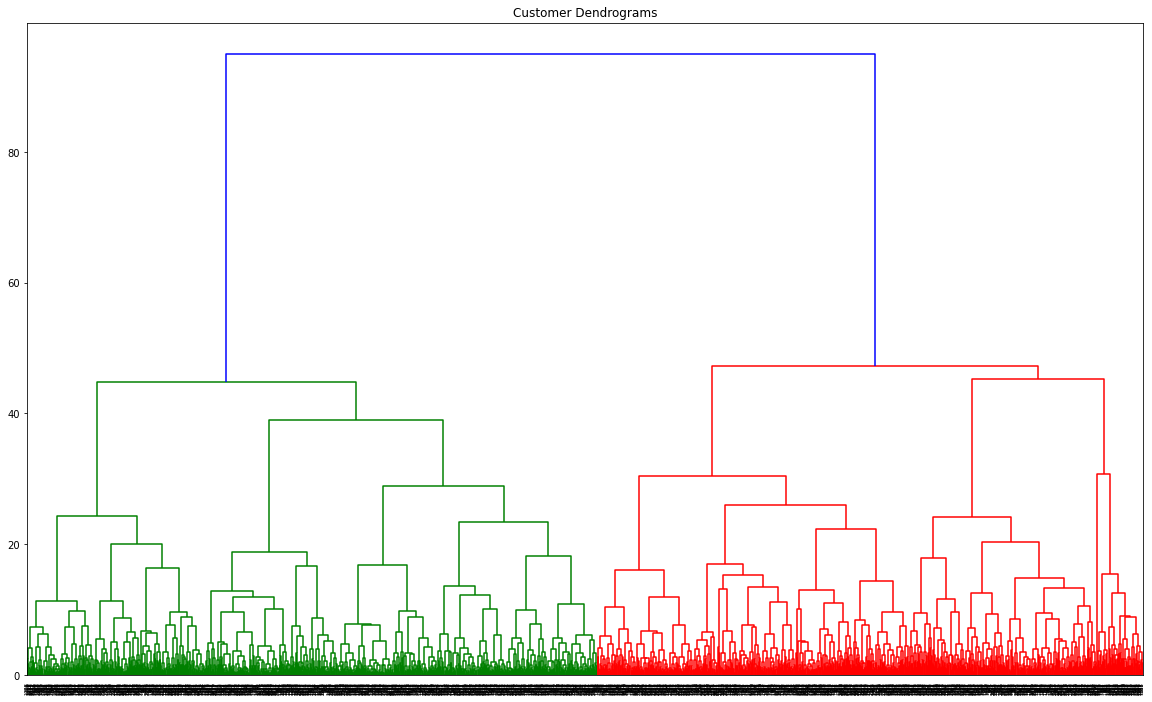

In [169]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 12))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(customer_pca, method='ward'))
plt.xticks(rotation = 90)

In [170]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
labels_agg = agg.fit_predict(customer_pca)

customer_pca['Cluster_Agg'] = labels_agg
customer_pca

0         1         2  ...         7         8  Cluster_Agg
0     2.664568 -0.477647 -0.039835  ... -0.398818 -0.276639            0
1    -1.783606  2.128529  1.824187  ...  0.268713 -0.220387            1
2     1.224657  0.531644 -0.199092  ...  0.027615  0.522945            2
3    -1.881068  0.024295  1.030333  ... -0.607415  0.013539            1
4    -0.196643 -0.145438 -0.283857  ... -0.267538  0.449190            1
...        ...       ...       ...  ...       ...       ...          ...
2235  0.928402  0.607056 -0.594133  ... -0.133540 -0.804875            2
2236 -0.221852  3.251590 -0.320320  ... -0.577481  0.209215            2
2237  1.469107 -0.792400  1.978378  ... -0.571499 -0.173733            0
2238  0.849738  1.543468 -0.586053  ... -0.342397  0.212272            2
2239 -0.714416  0.652684 -1.474622  ...  0.722625  0.134139            1

[2240 rows x 10 columns]

In [171]:
print("Clusters present: {}".format(np.unique(labels_agg)))
print("Cluster sizes Agglomerative clustering: {}".format(np.bincount(labels_agg)))

Clusters present: [0 1 2]
Cluster sizes Agglomerative clustering: [ 469 1145  626]


In [172]:
customer_agg = pd.concat([customer_final, pd.DataFrame({'Cluster' : labels_agg})], axis=1)
customer_agg

Education Marital_Status  ...  Purchases_total  Cluster
0         Graduate         Single  ...               25        0
1         Graduate         Single  ...                6        1
2         Graduate   Relationship  ...               21        2
3         Graduate   Relationship  ...                8        1
4     Postgraduate   Relationship  ...               19        1
...            ...            ...  ...              ...      ...
2235      Graduate   Relationship  ...               18        2
2236  Postgraduate   Relationship  ...               22        2
2237      Graduate         Single  ...               19        0
2238  Postgraduate   Relationship  ...               23        2
2239  Postgraduate   Relationship  ...               11        1

[2240 rows x 10 columns]

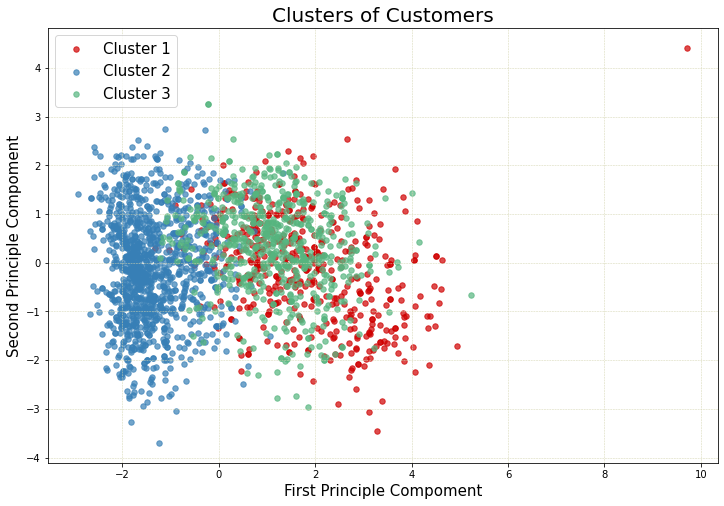

In [173]:
plt.figure(figsize=(12,8))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
#Plot cluster 1
plt.scatter(customer_pca.loc[customer_pca['Cluster_Agg']==0][0], customer_pca.loc[customer_pca['Cluster_Agg']==0][1], s=30, c='#CF0000', label='Cluster 1', alpha=0.7)
#Plot cluster 2
plt.scatter(customer_pca.loc[customer_pca['Cluster_Agg']==1][0], customer_pca.loc[customer_pca['Cluster_Agg']==1][1], s=30, c='#377FB6', label='Cluster 2', alpha=0.7)
#Plot cluster 3
plt.scatter(customer_pca.loc[customer_pca['Cluster_Agg']==2][0], customer_pca.loc[customer_pca['Cluster_Agg']==2][1], s=30, c='#56B57F', label='Cluster 3', alpha=0.7)

plt.title('Clusters of Customers', fontsize=20)
plt.xlabel('First Principle Compoment', fontsize=15)
plt.ylabel('Second Principle Compoment', fontsize=15)
plt.legend(fontsize=15)
plt.show()

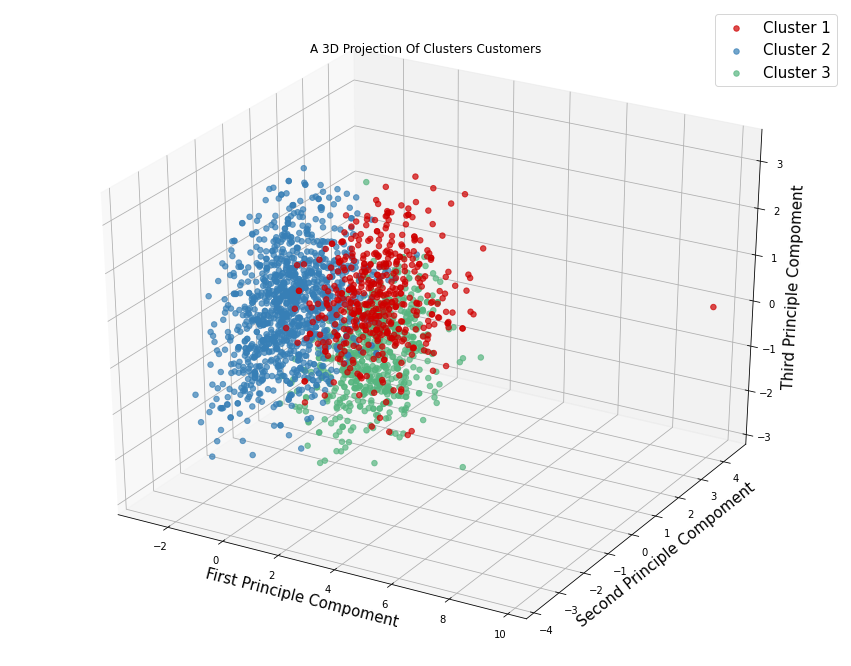

In [174]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(customer_pca.loc[customer_pca['Cluster_Agg']==0][0], customer_pca.loc[customer_pca['Cluster_Agg']==0][1]
           , customer_pca.loc[customer_pca['Cluster_Agg']==0][2], s=30, c='#CF0000', label='Cluster 1', alpha=0.7, marker="o")
ax.scatter(customer_pca.loc[customer_pca['Cluster_Agg']==1][0], customer_pca.loc[customer_pca['Cluster_Agg']==1][1]
           , customer_pca.loc[customer_pca['Cluster_Agg']==1][2], s=30, c='#377FB6', label='Cluster 2', alpha=0.7, marker="o")
ax.scatter(customer_pca.loc[customer_pca['Cluster_Agg']==2][0], customer_pca.loc[customer_pca['Cluster_Agg']==2][1]
           , customer_pca.loc[customer_pca['Cluster_Agg']==2][2], s=30, c='#56B57F', label='Cluster 3', alpha=0.7, marker="o")

ax.set_title("A 3D Projection Of Clusters Customers")
ax.set_xlabel('First Principle Compoment', fontsize=15)
ax.set_ylabel('Second Principle Compoment', fontsize=15)
ax.set_zlabel('Third Principle Compoment', fontsize=15)
plt.legend(fontsize=15)
plt.show()

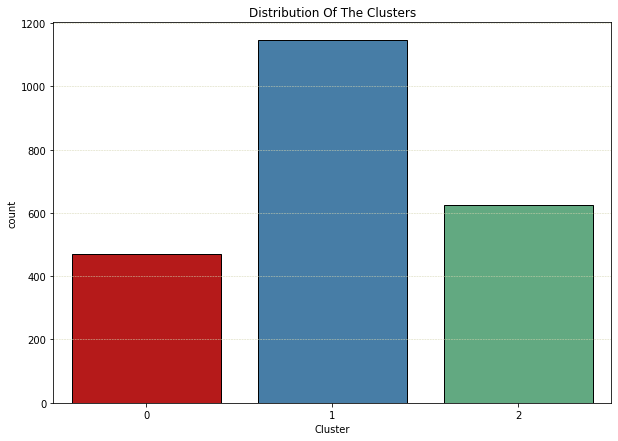

In [175]:
cl = ['#CF0000', '#377FB6', '#56B57F']
plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.countplot(x = customer_agg["Cluster"], palette= cl, ec='k')
pl.set_title("Distribution Of The Clusters")
plt.show()

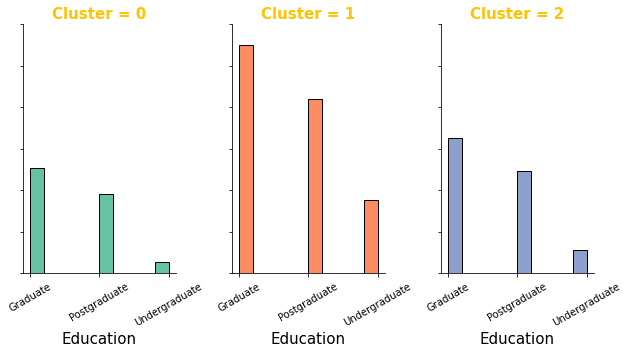

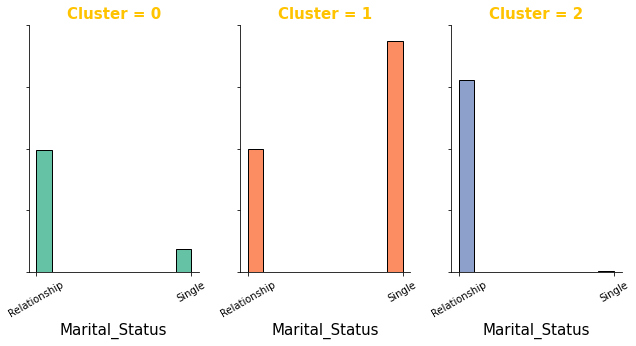

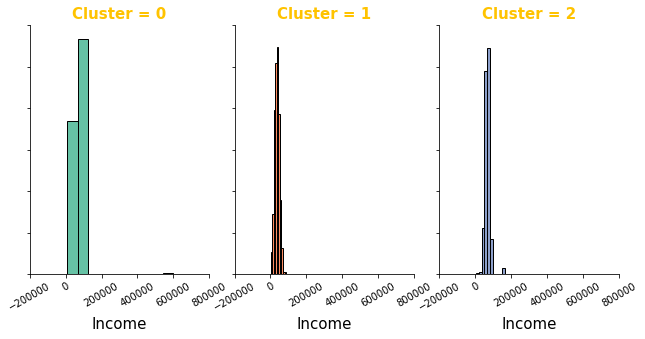

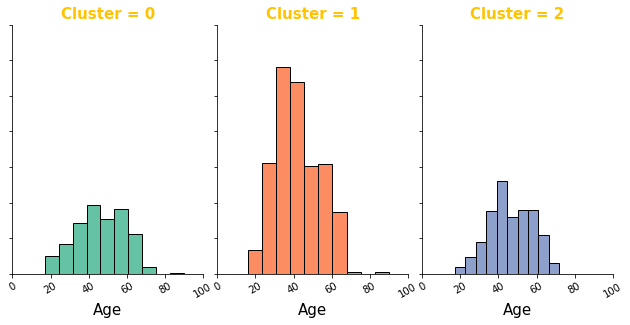

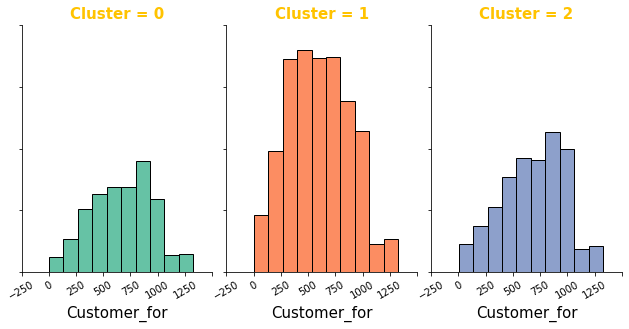

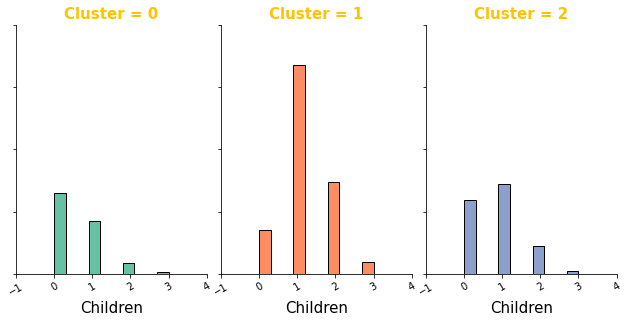

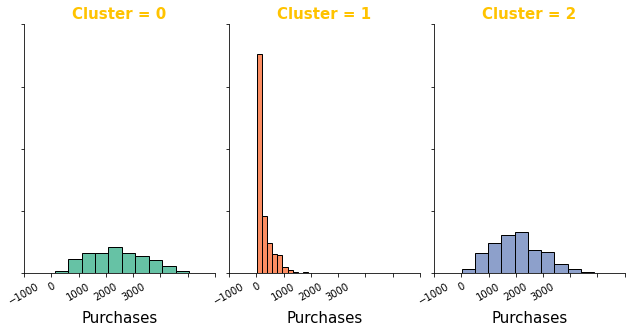

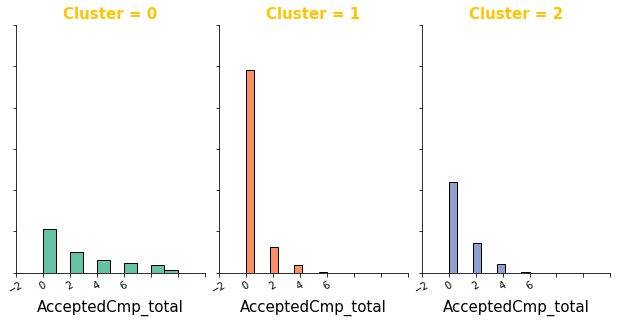

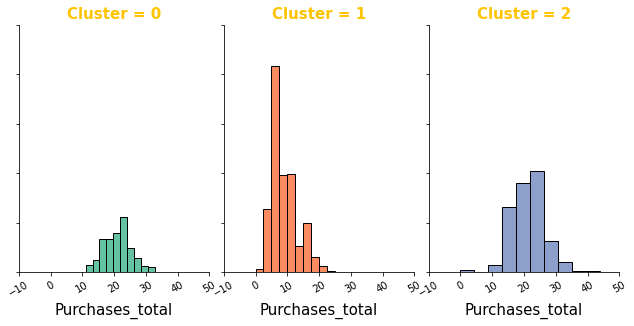

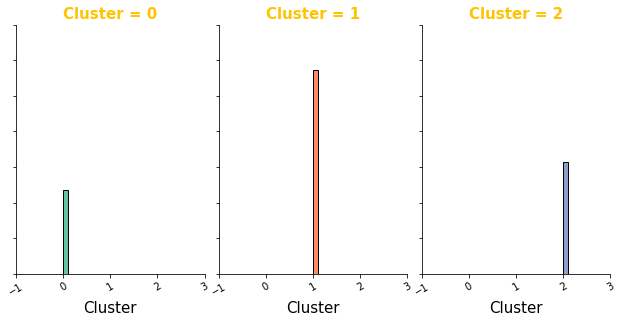

In [176]:
for i in customer_agg:
  x = sns.FacetGrid(customer_agg, col='Cluster', hue='Cluster', palette='Set2')
  x.map(plt.hist, i, bins=10, ec='k') 
  x.set_xticklabels(rotation=30, color='black')
  x.set_yticklabels(color='black')
  x.set_xlabels(size=15, color='black')
  x.set_titles(size=15, color='#FFC300', fontweight='bold')
  x.fig.set_figheight(5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


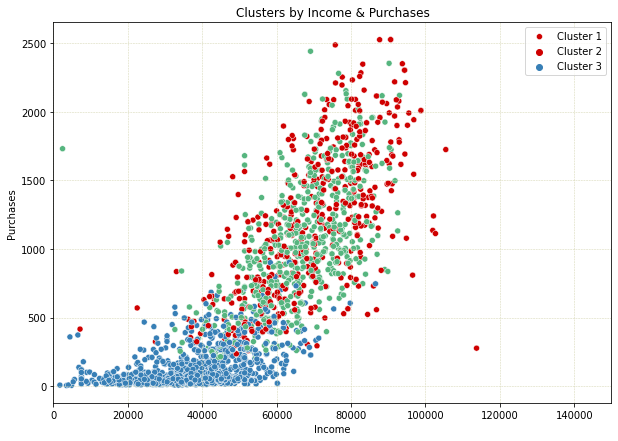

In [177]:
plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.scatterplot(customer_agg["Income"], customer_agg["Purchases"], hue = customer_agg["Cluster"], palette= cl, data=customer_agg)
pl.set_title("Clusters by Income & Purchases")
pl.set_xlim(xmin=0, xmax=150000)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


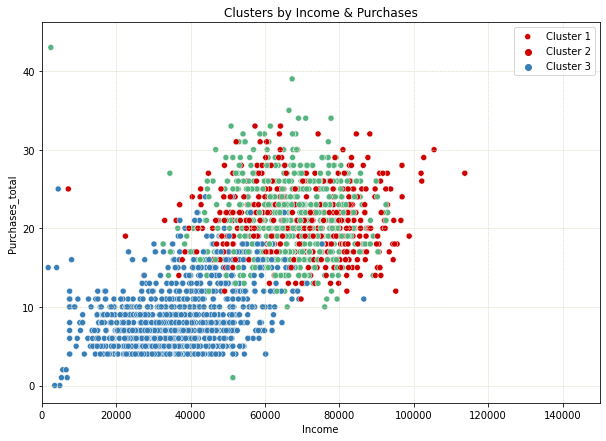

In [178]:
plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.scatterplot(customer_agg["Income"], customer_agg["Purchases_total"], hue = customer_agg["Cluster"], palette= cl, data=customer_agg)
pl.set_title("Clusters by Income & Purchases")
pl.set_xlim(xmin=0, xmax=150000)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


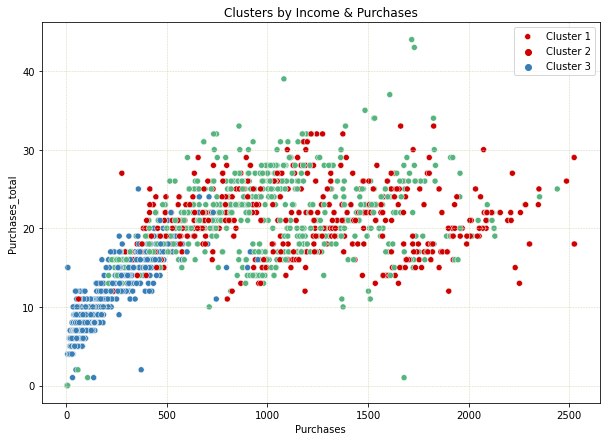

In [179]:
plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.scatterplot(customer_agg["Purchases"], customer_agg["Purchases_total"], hue = customer_agg["Cluster"], palette= cl, data=customer_agg)
pl.set_title("Clusters by Income & Purchases")
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

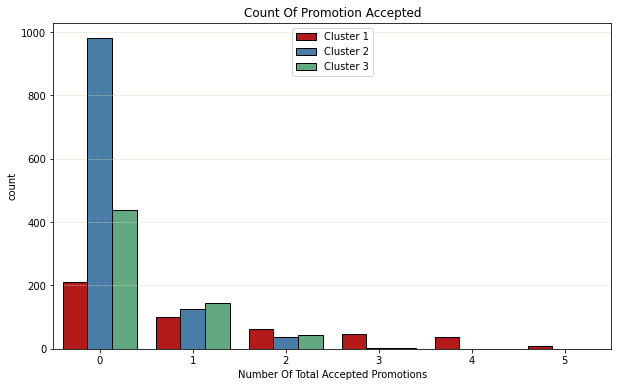

In [180]:
plt.figure(figsize=(10,6))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.countplot(x=customer_agg["AcceptedCmp_total"],hue=customer_agg["Cluster"], palette= cl, ec='k')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

## DBSCAN

---



In [181]:
customer_pca = customer_pca.iloc[:, 0:9]
customer_pca

0         1         2  ...         6         7         8
0     2.664568 -0.477647 -0.039835  ... -1.255402 -0.398818 -0.276639
1    -1.783606  2.128529  1.824187  ...  0.131352  0.268713 -0.220387
2     1.224657  0.531644 -0.199092  ... -0.646463  0.027615  0.522945
3    -1.881068  0.024295  1.030333  ...  0.307713 -0.607415  0.013539
4    -0.196643 -0.145438 -0.283857  ...  1.010353 -0.267538  0.449190
...        ...       ...       ...  ...       ...       ...       ...
2235  0.928402  0.607056 -0.594133  ...  0.053023 -0.133540 -0.804875
2236 -0.221852  3.251590 -0.320320  ...  1.537765 -0.577481  0.209215
2237  1.469107 -0.792400  1.978378  ...  0.107076 -0.571499 -0.173733
2238  0.849738  1.543468 -0.586053  ...  0.209327 -0.342397  0.212272
2239 -0.714416  0.652684 -1.474622  ... -0.186607  0.722625  0.134139

[2240 rows x 9 columns]

In [182]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
y_dbscan = dbscan.fit_predict(customer_scaled)
print("Clusters present: {}".format(np.unique(y_dbscan)))
print("Cluster sizes: {}".format(np.bincount(y_dbscan + 1)))

Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Cluster sizes: [2029   17   12   75   40    5    6    5   12    7    7    5    5    5
    5    5]


## Outlier Detection

In [183]:
for eps in[1,2,3,4,5]:
  print("\n eps = {}".format(eps))
  dbscan = DBSCAN(eps=eps, min_samples = 6)
  labels = dbscan.fit_predict(customer_pca)
  print("Clusters present: {}".format(np.unique(labels)))
  print("Cluster sizes: {}".format(np.bincount(labels+1)))


 eps = 1
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26]
Cluster sizes: [1065   50  293  200   13   10   90   36  136   49   30   19   17   50
   22   22   28   10   13   14    6   11   25    6    6    6    7    6]

 eps = 2
Clusters present: [-1  0  1]
Cluster sizes: [  51  769 1420]

 eps = 3
Clusters present: [-1  0]
Cluster sizes: [   8 2232]

 eps = 4
Clusters present: [-1  0]
Cluster sizes: [   1 2239]

 eps = 5
Clusters present: [-1  0]
Cluster sizes: [   1 2239]


In [184]:
dbscan = DBSCAN(eps=2, min_samples = 6)
labels_dbscan = dbscan.fit_predict(customer_pca)

print("Clusters present: {}".format(np.unique(labels_dbscan)))
print("Cluster sizes DBSCAN clustering: {}".format(np.bincount(labels_dbscan + 1)))

Clusters present: [-1  0  1]
Cluster sizes DBSCAN clustering: [  51  769 1420]


In [185]:
customer_pca['Cluster_DBSCAN'] = labels_dbscan
customer_pca

0         1         2  ...         7         8  Cluster_DBSCAN
0     2.664568 -0.477647 -0.039835  ... -0.398818 -0.276639               0
1    -1.783606  2.128529  1.824187  ...  0.268713 -0.220387               0
2     1.224657  0.531644 -0.199092  ...  0.027615  0.522945               1
3    -1.881068  0.024295  1.030333  ... -0.607415  0.013539               1
4    -0.196643 -0.145438 -0.283857  ... -0.267538  0.449190               1
...        ...       ...       ...  ...       ...       ...             ...
2235  0.928402  0.607056 -0.594133  ... -0.133540 -0.804875               1
2236 -0.221852  3.251590 -0.320320  ... -0.577481  0.209215               1
2237  1.469107 -0.792400  1.978378  ... -0.571499 -0.173733               0
2238  0.849738  1.543468 -0.586053  ... -0.342397  0.212272               1
2239 -0.714416  0.652684 -1.474622  ...  0.722625  0.134139               1

[2240 rows x 10 columns]

In [186]:
customer_dbscan = pd.concat([customer_final, pd.DataFrame({'Cluster' : labels_dbscan})], axis=1)
customer_dbscan

Education Marital_Status  ...  Purchases_total  Cluster
0         Graduate         Single  ...               25        0
1         Graduate         Single  ...                6        0
2         Graduate   Relationship  ...               21        1
3         Graduate   Relationship  ...                8        1
4     Postgraduate   Relationship  ...               19        1
...            ...            ...  ...              ...      ...
2235      Graduate   Relationship  ...               18        1
2236  Postgraduate   Relationship  ...               22        1
2237      Graduate         Single  ...               19        0
2238  Postgraduate   Relationship  ...               23        1
2239  Postgraduate   Relationship  ...               11        1

[2240 rows x 10 columns]

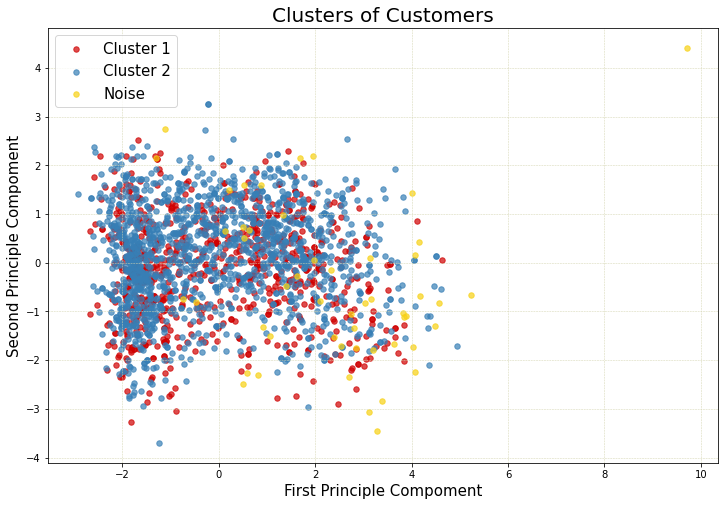

In [187]:
plt.figure(figsize=(12,8))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
#Plot cluster 1
plt.scatter(customer_pca.loc[customer_pca['Cluster_DBSCAN']==0][0], customer_pca.loc[customer_pca['Cluster_DBSCAN']==0][1], s=30, c='#CF0000', label='Cluster 1', alpha=0.7)
#Plot cluster 2
plt.scatter(customer_pca.loc[customer_pca['Cluster_DBSCAN']==1][0], customer_pca.loc[customer_pca['Cluster_DBSCAN']==1][1], s=30, c='#377FB6', label='Cluster 2', alpha=0.7)
#Plot cluster 3
plt.scatter(customer_pca.loc[customer_pca['Cluster_DBSCAN']==-1][0], customer_pca.loc[customer_pca['Cluster_DBSCAN']==-1][1], s=30, c='#F7D114', label='Noise', alpha=0.7)

plt.title('Clusters of Customers', fontsize=20)
plt.xlabel('First Principle Compoment', fontsize=15)
plt.ylabel('Second Principle Compoment', fontsize=15)
plt.legend(fontsize=15)
plt.show()

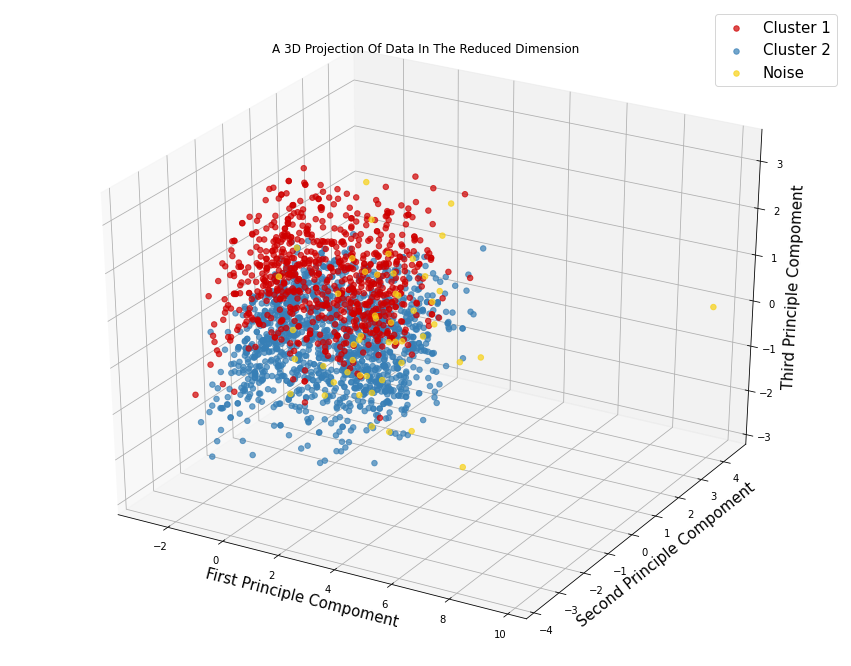

In [188]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(customer_pca.loc[customer_pca['Cluster_DBSCAN']==0][0], customer_pca.loc[customer_pca['Cluster_DBSCAN']==0][1]
           , customer_pca.loc[customer_pca['Cluster_DBSCAN']==0][2], s=30, c='#CF0000', label='Cluster 1', alpha=0.7, marker="o")
ax.scatter(customer_pca.loc[customer_pca['Cluster_DBSCAN']==1][0], customer_pca.loc[customer_pca['Cluster_DBSCAN']==1][1]
           , customer_pca.loc[customer_pca['Cluster_DBSCAN']==1][2], s=30, c='#377FB6', label='Cluster 2', alpha=0.7, marker="o")
ax.scatter(customer_pca.loc[customer_pca['Cluster_DBSCAN']==-1][0], customer_pca.loc[customer_pca['Cluster_DBSCAN']==-1][1]
           , customer_pca.loc[customer_pca['Cluster_DBSCAN']==-1][2], s=30, c='#F7D114', label='Noise', alpha=0.7, marker="o")

ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel('First Principle Compoment', fontsize=15)
ax.set_ylabel('Second Principle Compoment', fontsize=15)
ax.set_zlabel('Third Principle Compoment', fontsize=15)
plt.legend(fontsize=15)
plt.show()

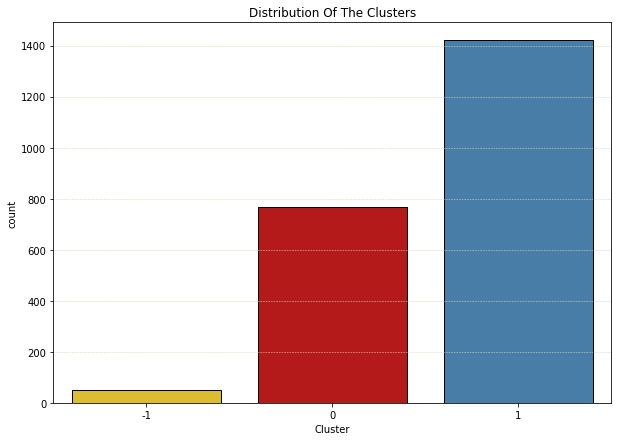

In [189]:
cl = ['#F7D114', '#CF0000', '#377FB6']
plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
pl = sns.countplot(x = customer_dbscan["Cluster"], palette= cl, ec='k')
pl.set_title("Distribution Of The Clusters")
plt.show()

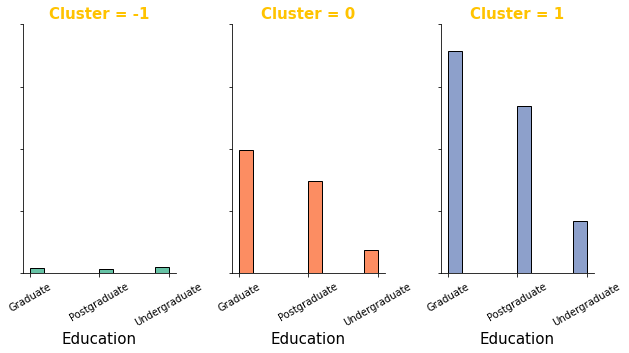

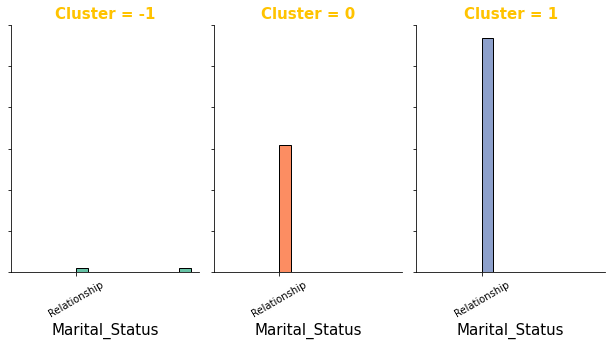

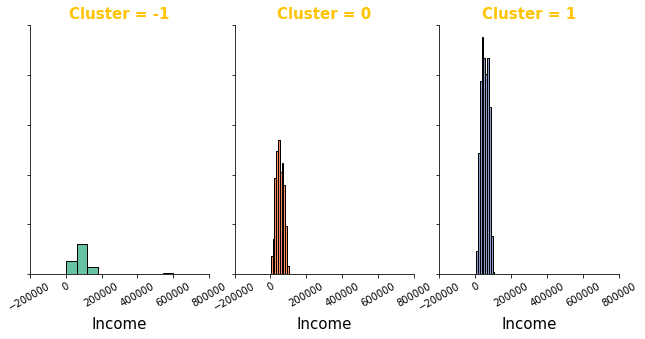

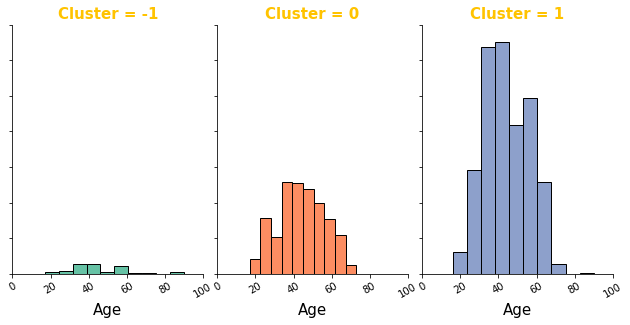

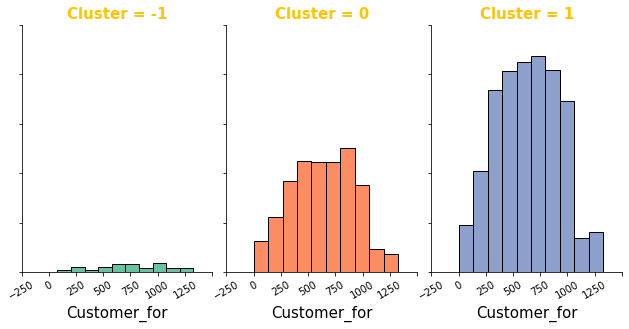

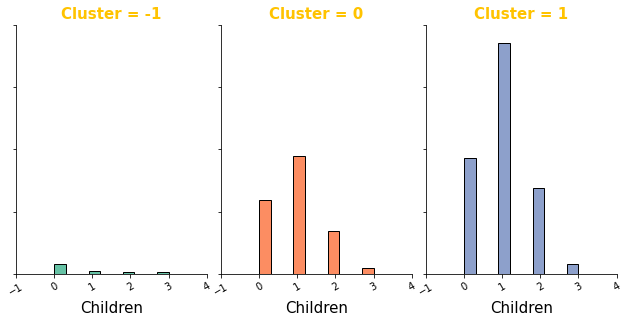

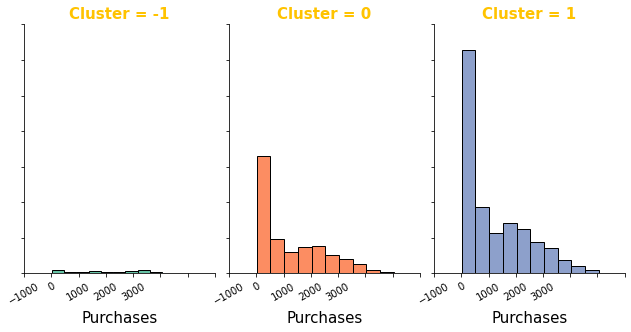

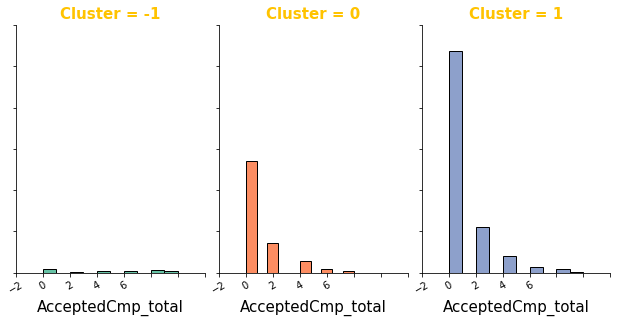

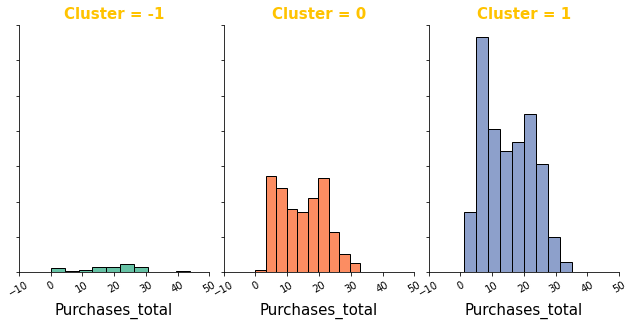

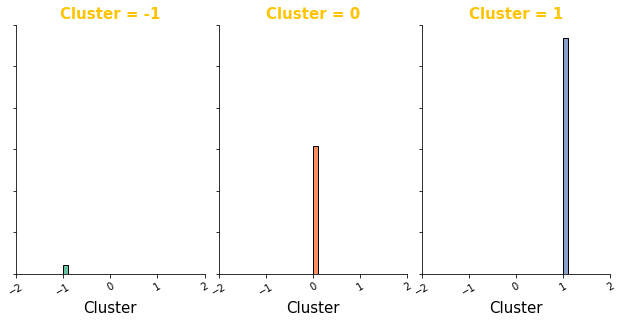

In [190]:
for i in customer_dbscan:
  x = sns.FacetGrid(customer_dbscan, col='Cluster', hue='Cluster', palette='Set2')
  x.map(plt.hist, i, bins=10, ec='k') 
  x.set_xticklabels(rotation=30, color='black')
  x.set_yticklabels(color='black')
  x.set_xlabels(size=15, color='black')
  x.set_titles(size=15, color='#FFC300', fontweight='bold')
  x.fig.set_figheight(5)

# **5. Evaluating Model**

## Compare models using ARI

In [191]:
from sklearn.metrics.cluster import adjusted_rand_score

print("ARI - KMeans VS Agglomerative: {:.2f}".format(adjusted_rand_score(labels_kmeans, labels_agg)))
print("ARI - KMeans VS DBSCAN: {:.2f}".format(adjusted_rand_score(labels_kmeans, labels_dbscan)))
print("ARI - Agglomerative VS DBSCAN: {:.2f}".format(adjusted_rand_score(labels_agg, labels_dbscan)))

ARI - KMeans VS Agglomerative: 0.58
ARI - KMeans VS DBSCAN: 0.02
ARI - Agglomerative VS DBSCAN: 0.18


## Compare models using silhouette

In [192]:
from sklearn.metrics.cluster import silhouette_score

customer_pca = customer_pca.iloc[:, 0:9]
algorithms = [KMeans(n_clusters = 3, n_init=100, random_state=RANDOM_STATE),
              AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward'),
              DBSCAN(eps=2, min_samples = 6)]
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(customer_final))

In [193]:
#random assignment 
print("Random assignment - silhouette score: {:.2f}".format(silhouette_score(customer_pca, random_clusters)))

Random assignment - silhouette score: 0.00


In [194]:
for algorithm in algorithms: 
  clusters = algorithm.fit_predict(customer_pca)
  print("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(customer_pca, clusters)))

KMeans : 0.19
AgglomerativeClustering : 0.17
DBSCAN : 0.14
